## Generate all the images:

Watch out to homogenize the images:

1. Specify the writing style for all texts in the figure
2. Get rid of all the title headers and comment them out
3. All the axis titles in small (not capital) letters
4. $/year and not USD/ year
5. make sure that axis titles are clear

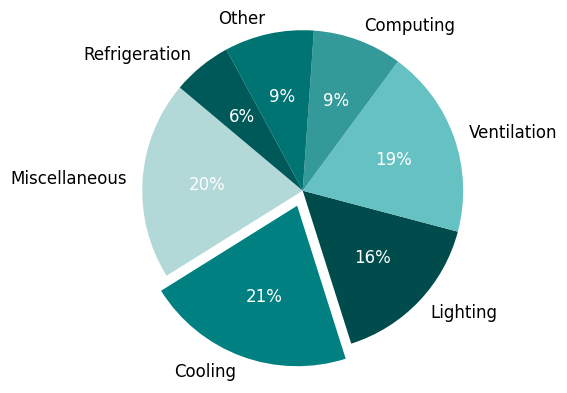

In [76]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['Miscellaneous', 'Cooling', 'Lighting', 'Ventilation', 'Computing', 'Other', 'Refrigeration']
sizes = [20, 21, 16, 19, 9, 9, 6]

# Explode the largest slice (Cooling)
explode = (0, 0.1, 0, 0, 0, 0, 0)  

# Blue color palette
colors_1 = ['steelblue', 'lightskyblue', 'deepskyblue', 'cornflowerblue', 'royalblue', 'skyblue', 'lightblue']

colors_2 = ['#b2d8d8', '#008080', '#004c4c', '#66c2c2', '#339999', '#007373', '#005959']

colors = colors_2
# Create the pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
                                  startangle=140, colors=colors)
plt.setp(autotexts, color="white")  # Percentage texts
# Add a title
#plt.title(f'Electricity end uses', fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  

# Improve text readability
for text in texts + autotexts:
    text.set_fontsize(12)

plt.show()


fig.savefig(r"C:\Users\jonas\OneDrive\Dokumente\EPFL École polytéchnique de Lausanne\Cours\MA4\MIT Master Thesis\Work\Results\Plots\hospital_end_uses.png", dpi=300, bbox_inches='tight')

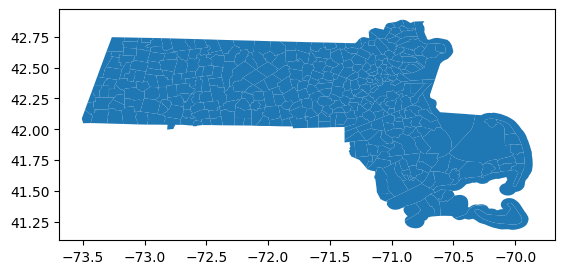

,geometry
0,"POLYGON ((-71.49701 42.2899, -71.4968 42.29031..."
1,"POLYGON ((-73.46017 42.21765, -73.45952 42.219..."
2,"POLYGON ((-73.33362 42.3689, -73.33078 42.3690..."
3,"POLYGON ((-73.27355 42.59088, -73.27344 42.591..."
4,"POLYGON ((-73.1621 42.19703, -73.16208 42.1987..."


In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile
shapefile = gpd.read_file('tl_2023_25_cousub.shp') 

# Display the shapefile
shapefile.plot()
plt.show()

shapefile.head()

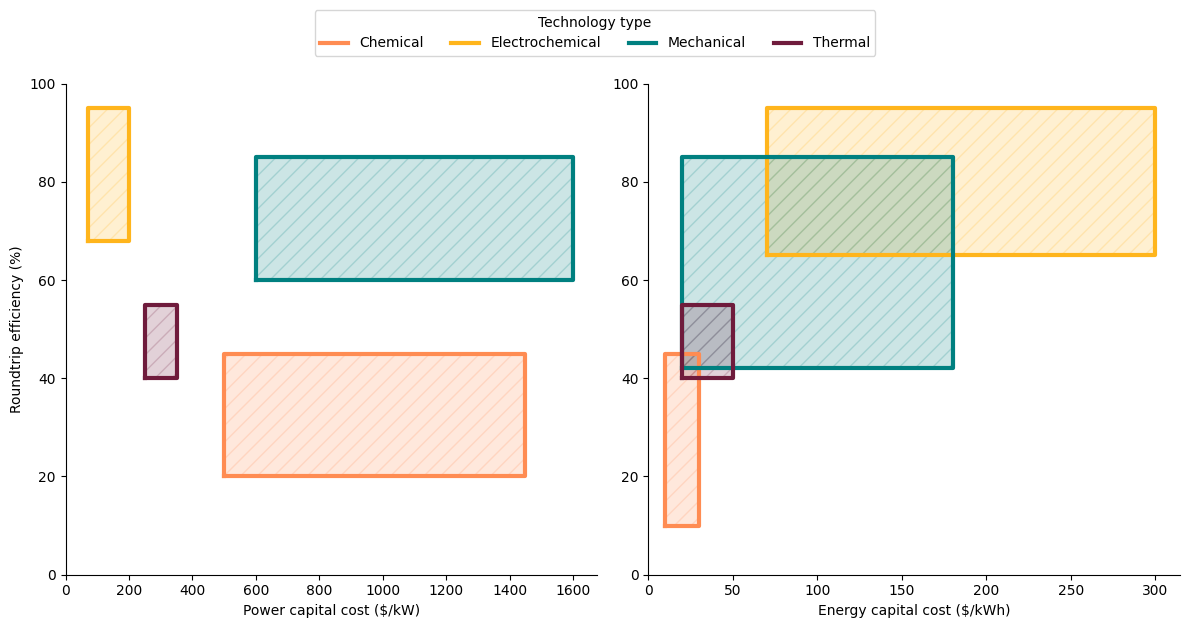

In [75]:
import matplotlib.pyplot as plt

# Data for the plot (including all 4 points for each rectangle)
# Note: The first and last points of each rectangle now have the same x-coordinate
power_cost = {
    "Chemical": [[500, 20], [1450, 20], [1450, 45], [500, 45], [500, 20]],  # Close the loop
    "Electrochemical": [[70, 68], [200, 68], [200, 95], [70, 95], [70, 68]],  # Close the loop
    "Mechanical": [[600, 60], [1600, 60], [1600, 85], [600, 85], [600, 60]],  # Close the loop
    "Thermal": [[250, 40], [350, 40], [350, 55], [250, 55], [250, 40]],  # Close the loop
}
energy_cost = {
    "Chemical": [[10, 10], [30, 10], [30, 45], [10, 45], [10, 10]],  # Close the loop
    "Electrochemical": [[70, 65], [300, 65], [300, 95], [70, 95], [70, 65]],  # Close the loop
    "Mechanical": [[20, 42], [180, 42], [180, 85], [20, 85], [20, 42]],  # Close the loop
    "Thermal": [[20, 40], [50, 40], [50, 55], [20, 55], [20, 40]],  # Close the loop
}


colors_manual_1 = {
    "Chemical": "#ffb51c",
    "Electrochemical": "#ff6b6b",
    "Mechanical": "#008080",
    "Thermal": "#a787ac",
}
colors_manual_2 = {
    "Chemical": "#d66767",
    "Electrochemical": "#ff5757",
    "Mechanical": "#57a3ab",
    "Thermal": "#57bfbb",
}

colors_manual_2 = {
    "Chemical": "#ff8c52",
    "Electrochemical": "#ffb51c",
    "Mechanical": "#008080",
    "Thermal": "#6f1b3c",
}


colors = colors_manual_2

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the data
for tech_type in power_cost:
    x_coords, y_coords = zip(*power_cost[tech_type])  # Unpack coordinates
    ax1.plot(x_coords, y_coords, color=colors[tech_type], linewidth=3)
    ax1.fill(x_coords, y_coords, color=colors[tech_type], alpha=0.2, hatch='//')

    x_coords, y_coords = zip(*energy_cost[tech_type])  # Unpack coordinates
    ax2.plot(x_coords, y_coords, color=colors[tech_type], linewidth=3)
    ax2.fill(x_coords, y_coords, color=colors[tech_type], alpha=0.2, hatch='//')

# Remove the top and right spines
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Set axis labels and titles
ax1.set_xlabel("Power capital cost ($/kW)")
ax1.set_ylabel("Roundtrip efficiency (%)")
ax2.set_xlabel("Energy capital cost ($/kWh)")

# Add a legend at the top
handles = [
    plt.Line2D([], [], color=colors[tech_type], label=tech_type)
    for tech_type in colors
]

for handle in handles:
    if isinstance(handle, plt.Line2D):  # Check if the handle is a line
        handle.set_linewidth(3)  # Set the desired thickness
fig.legend(handles=handles, title="Technology type", loc="upper center", ncol=4, bbox_to_anchor=(0.5, 1.05))

# Set axis limits to start at 0
ax1.set_xlim(left=0)
ax1.set_ylim(bottom=0, top=100)
ax2.set_xlim(left=0)
ax2.set_ylim(bottom=0, top=100)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

fig.savefig(r"C:\Users\jonas\OneDrive\Dokumente\EPFL École polytéchnique de Lausanne\Cours\MA4\MIT Master Thesis\Work\Results\Plots\technologies_densities.png", dpi=300, bbox_inches='tight')


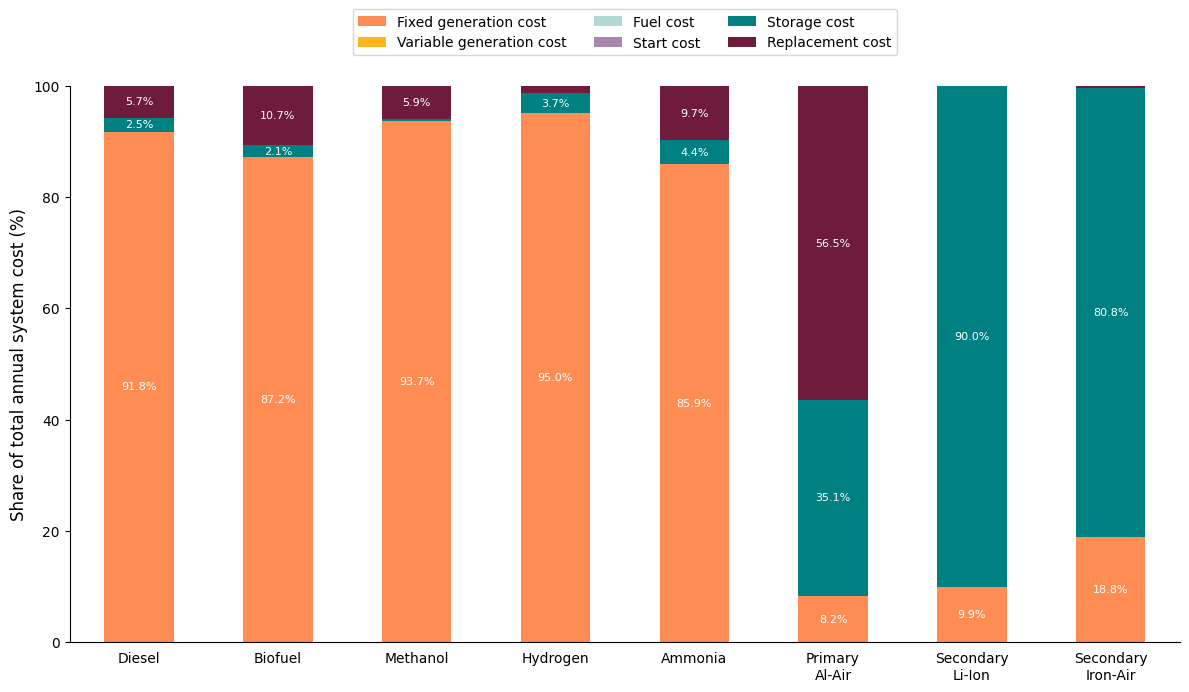

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import textwrap

# Data
data = {
    "Technology": ["Diesel", "Biofuel", "Methanol", "Hydrogen", "Ammonia", "Primary Al-Air", "Secondary Li-Ion", "Secondary Iron-Air"],
    "Fixed generation cost": [109688, 119916, 436681, 366109, 140767, 24391, 60386, 39360],
    "Variable generation cost": [0, 0, 0, 0, 0, 0, 0, 0],
    "Fuel cost": [4, 4, 4, 3, 5, 402, 3, 4],
    "Start cost": [0, 0, 0, 0, 0, 0, 0, 0],
    "Storage cost": [2976, 2916, 1861, 14256, 7178, 104097, 550602, 168999],
    "Replacement cost": [6841, 14706, 27329, 4825, 15941, 167292, 526, 861],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set Technology as index
df.set_index("Technology", inplace=True)

# Normalize the data so each column sums to 100%
df_normalized = df.div(df.sum(axis=1), axis=0) * 100

# Wrap long names to prevent overlap
wrapped_labels = [textwrap.fill(label, 10) for label in df.index]

# Plot
fig, ax = plt.subplots(figsize=(12, 7))

# Stacked bar plot
df_normalized.plot(kind='bar', stacked=True, ax=ax, color=["#ff8c52", "#ffb51c", "#b2d8d8", "#a787ac", "#008080", "#6f1b3c"])

# Add labels and title
ax.set_ylabel("Share of total annual system cost (%)", fontsize=12)
ax.set_xlabel("")
#ax.set_title("Normalized Cost Structure for Different Technologies", fontsize=14)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Rotate x-axis labels to horizontal and use wrapped labels
ax.set_xticklabels(wrapped_labels, rotation=0, ha='center')
ax.xaxis.set_ticks_position('none')

# Add values to the bars, excluding labels smaller than 2%
for container in ax.containers:
    labels = [f"{w:.1f}%" if w > 2 else "" for w in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=8, color='white')


# Place the legend above the plot
ax.legend(title="", loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=3, fontsize=10)

# Adjust layout for better display
plt.tight_layout(rect=[0, 0, 1, 1])

ax.set_ylim(0, 100)

# Show plot
plt.show()






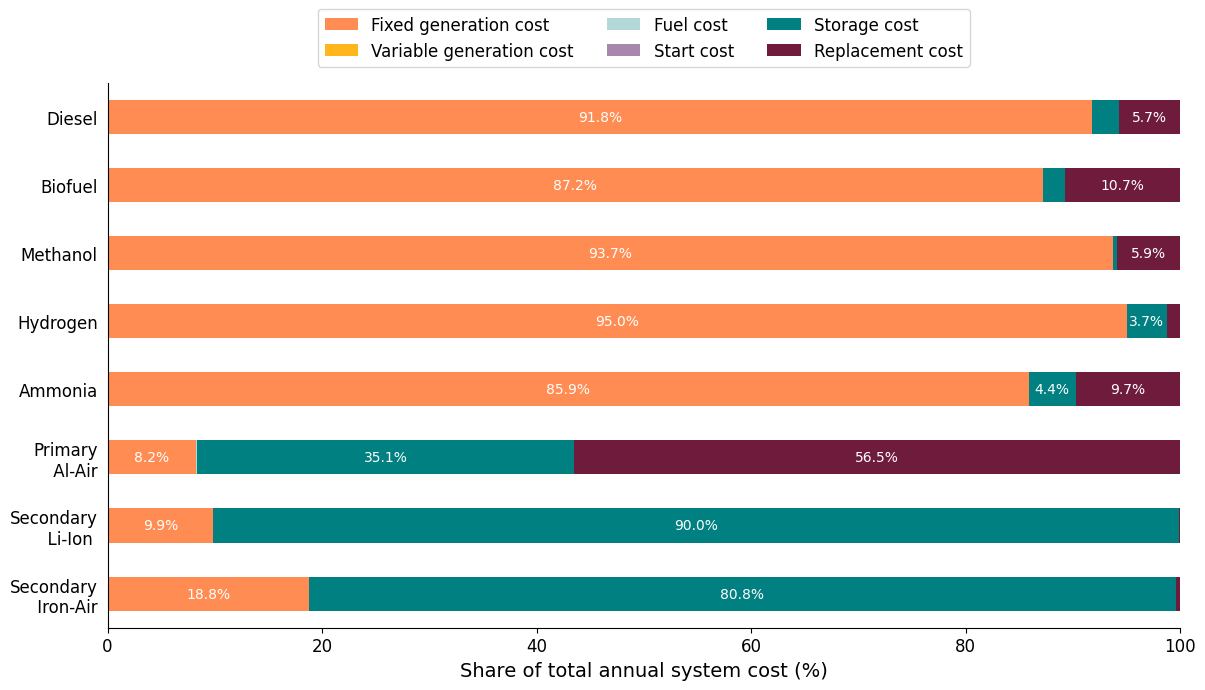

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import textwrap

# Data
data = {
    "Technology": ["Diesel", "Biofuel", "Methanol", "Hydrogen", "Ammonia", "Primary Al-Air", "Secondary Li-Ion", "Secondary Iron-Air"],
    "Fixed generation cost": [109688, 119916, 436681, 366109, 140767, 24391, 60386, 39360],
    "Variable generation cost": [0, 0, 0, 0, 0, 0, 0, 0],
    "Fuel cost": [4, 4, 4, 3, 5, 402, 3, 4],
    "Start cost": [0, 0, 0, 0, 0, 0, 0, 0],
    "Storage cost": [2976, 2916, 1861, 14256, 7178, 104097, 550602, 168999],
    "Replacement cost": [6841, 14706, 27329, 4825, 15941, 167292, 526, 861],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set Technology as index
df.set_index("Technology", inplace=True)

# Normalize the data so each column sums to 100%
df_normalized = df.div(df.sum(axis=1), axis=0) * 100

def wrap_and_center(label, width):
    lines = textwrap.fill(label, width).split("\n")
    max_width = max(len(line) for line in lines)
    centered_lines = [line.center(max_width) for line in lines]
    return "\n".join(centered_lines)

wrapped_labels = [wrap_and_center(label, 10) for label in df.index]

# Plot
fig, ax = plt.subplots(figsize=(12, 7))

# Stacked bar plot
df_normalized[::-1].plot(kind='barh', stacked=True, ax=ax, color=["#ff8c52", "#ffb51c", "#b2d8d8", "#a787ac", "#008080", "#6f1b3c"])


# Remove y-axis ticks and labels, but keep technology names next to the bars
ax.set_yticks(range(len(df_normalized.index)))
ax.set_yticklabels(wrapped_labels[::-1], rotation=0, ha='right', fontsize=12)
ax.tick_params(axis='y', left=False)
ax.tick_params(axis='x', labelsize=12)

# Add labels and title
ax.set_xlabel("Share of total annual system cost (%)", fontsize=14)
ax.set_ylabel("")
#ax.set_title("Normalized Cost Structure for Different Technologies", fontsize=14)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#ax.xaxis.set_ticks_position('none')

# Add values to the bars, excluding labels smaller than 2%
for container in ax.containers:
    labels = [f"{w:.1f}%" if w > 3.5 else "" for w in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, color='white')


# Place the legend above the plot
ax.legend(title="", loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=3, fontsize=12)

# Adjust layout for better display
plt.tight_layout(rect=[0, 0, 1, 1])

ax.set_xlim(0, 100)

# Show plot
plt.show()

fig.savefig(r"C:\Users\jonas\OneDrive\Dokumente\EPFL École polytéchnique de Lausanne\Cours\MA4\MIT Master Thesis\Work\Results\Plots\cost_structure_8h_v2.png", dpi=300, bbox_inches='tight')

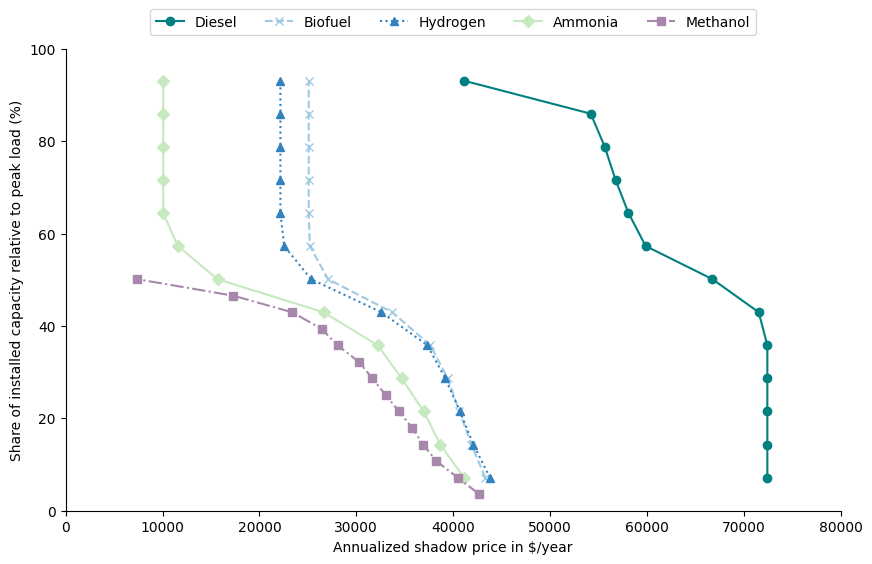

In [4]:
import matplotlib.pyplot as plt

# Data for Diesel generator
diesel_dual = [
    72432.60346, 72432.60346, 72432.60337, 72432.60328, 72432.60268,
    71543.45135, 66764.27263, 59873.36648, 58095.05242, 56761.30934,
    55649.87205, 54205.00416, 41090.96249
]
diesel_percent = [
    7.16, 14.32, 21.48, 28.64, 35.80, 42.96, 50.12, 57.29, 64.45, 71.61,
    78.77, 85.93, 93.09
]

# Data for Biodiesel generator
biodiesel_dual = [
    43320.28051, 41875.41278, 40652.8319, 39430.23241, 37651.91835,
    33706.31836, 27091.14163, 25203.82724, 25092.68172, 25092.68146,
    25092.68137, 25092.68137, 25092.68137
]
biodiesel_percent = [
    7.16, 14.32, 21.48, 28.64, 35.80, 42.96, 50.12, 57.29, 64.45, 71.61,
    78.77, 85.93, 93.09
]

# Data for Methanol fuel cell
methanol_dual = [
    42689.88021, 40482.90796, 38275.93531, 36896.5774, 35793.0914, 34413.73383,
    33034.37627, 31655.01876, 30275.66122, 28068.68926, 26413.46027, 23378.87375,
    17309.7009, 7378.327404
]
methanol_percent = [
    3.58, 7.16, 10.74, 14.32, 17.90, 21.48, 25.06, 28.64, 32.22, 35.80, 39.38,
    42.96, 46.54, 50.12
]

# Data for Hydrogen fuel cell
hydrogen_dual = [
    43803.59745, 42088.61004, 40704.93342, 39186.32356, 37339.41395, 32590.21801,
    25334.5011, 22564.10708, 22168.29228, 22168.2661, 22168.22303, 22168.22303,
    22168.22303
]
hydrogen_percent = [
    7.16, 14.32, 21.48, 28.64, 35.80, 42.96, 50.12, 57.29, 64.45, 71.61, 78.77,
    85.93, 93.09
]

# Data for Ammonia generator
ammonia_dual = [
    41128.49758, 38666.01588, 36961.21977, 34688.13089, 32225.61211, 26621.47381,
    15679.23207, 11578.65112, 10063.27384, 10063.27301, 10063.27281, 10063.27273,
    10063.27273
]
ammonia_percent = [
    7.16, 14.32, 21.48, 28.64, 35.80, 42.96, 50.12, 57.29, 64.45, 71.61, 78.77,
    85.93, 93.09
]

# Data for Primary batteries
#primary_battery_dual = [
#    24352.23341, 23148.03695, 22579.41119, 22502.07065, 19033.76676, 18931.14165,
#    15488.12106, 15488.12106, 11852.17905, 9145.734094, 7091.570833, 6445.682354,
#    6445.682354
#]
#primary_battery_percent = [
#    0.651, 1.302, 1.953, 2.604, 3.255, 3.906, 4.557, 5.208, 5.859, 6.510, 7.161,
#    7.812, 8.463
#]


# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))  # Explicitly create a figure and axes

# Plot Diesel data
ax.plot(diesel_dual, diesel_percent, marker='o', linestyle='-', color='#008080', label='Diesel')

# Plot Biodiesel data
ax.plot(biodiesel_dual, biodiesel_percent, marker='x', linestyle='--', color='#9ecae1', label='Biofuel')



# Plot Hydrogen data
ax.plot(hydrogen_dual, hydrogen_percent, marker='^', linestyle=':', color='#3182bd', label='Hydrogen')

# Plot Ammonia data
ax.plot(ammonia_dual, ammonia_percent, marker='D', linestyle='-', color='#c7e9c0', label='Ammonia')
# Plot Methanol data
ax.plot(methanol_dual, methanol_percent, marker='s', linestyle='-.', color='#a787ac', label='Methanol')

good_colors_manual_2 = {
    'Diesel': '#008080',         
    'Biofuel': '#9ecae1',        
    'Methanol': '#a787ac',          
    'Hydrogen': '#3182bd',         
    'Ammonia': '#c7e9c0',           
    'Primary Al-Air': '#ff8c52',    
    'Secondary Li-Ion': '#ffb51c',  
    'Secondary Iron-Air': '#31a354' 
} 


# Customize the plot
ax.set_xlabel('Annualized shadow price in $/year')
ax.set_ylabel('Share of installed capacity relative to peak load (%)')
ax.grid(False)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add legend and set x-axis limits
ax.set_xlim(0,80000)
ax.set_ylim(0, 100)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=5)

# Show the plot
plt.show()

fig.savefig(r"C:\Users\jonas\OneDrive\Dokumente\EPFL École polytéchnique de Lausanne\Cours\MA4\MIT Master Thesis\Work\Results\Plots\sensitivity_analysis.png", dpi=300, bbox_inches='tight')

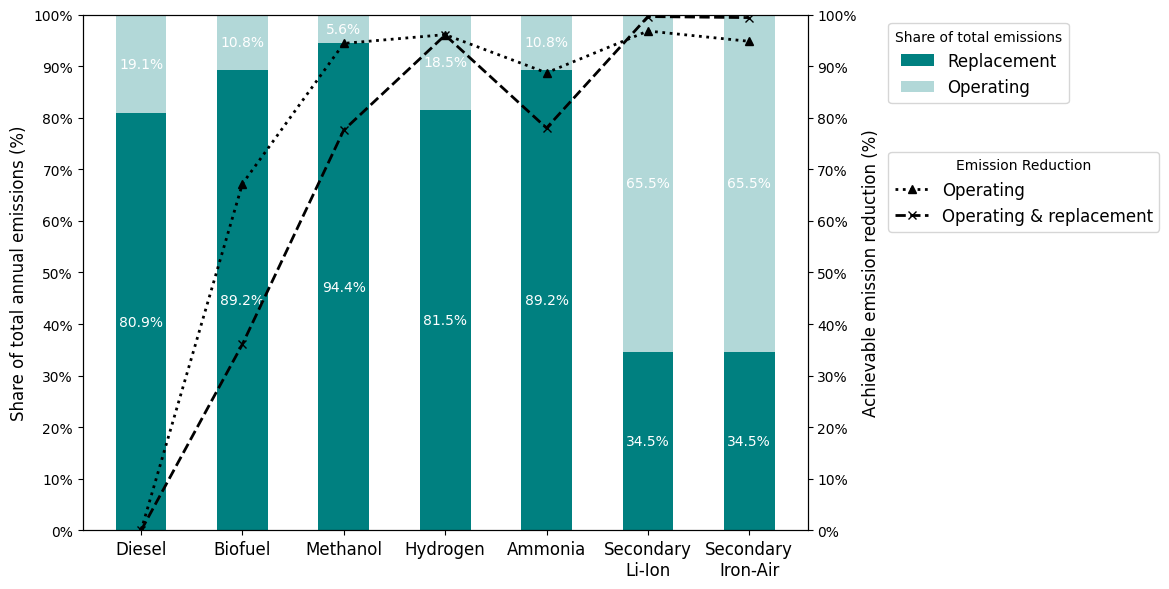

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
import textwrap

# Data
categories = ['Diesel', 'Biofuel', 'Methanol', 'Hydrogen', 'Ammonia', 'Secondary Li-Ion', 'Secondary Iron-Air']
operating_emission_reduction = [0.0, 0.672, 0.944, 0.961, 0.887, 0.968, 0.948]  # Operating emission reduction
operating_and_replacement_reduction = [0.0, 0.361, 0.776, 0.960, 0.780, 0.996, 0.994]  # Combined reduction
share_replacement_emissions = [0.809, 0.892, 0.944, 0.815, 0.892, 0.345, 0.345]  # Share of replacement emissions

# Convert share of replacement emissions to total yearly emissions for stacked bar
share_operation_emissions = [1 - s for s in share_replacement_emissions]

# Wrap long names to prevent overlap
wrapped_labels = [textwrap.fill(label, 10) for label in categories]

# Bar width
bar_width = 0.5

# Create the figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot stacked bar chart
bar_positions = np.arange(len(categories))
bars1 = ax1.bar(bar_positions, share_replacement_emissions, bar_width, label='Replacement emissions', color='#008080') 
bars2 = ax1.bar(bar_positions, share_operation_emissions, bar_width, bottom=share_replacement_emissions, label='Operating emissions', color='#b2d8d8')

# Format primary y-axis
ax1.set_ylabel('Share of total annual emissions (%)', fontsize=12)
ax1.set_ylim(0, 1)
ax1.set_yticks(np.arange(0, 1.1, 0.1))
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(wrapped_labels, rotation=0, ha='center', fontsize =12)

# Format y-axis to display percentages
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:.0f}%'))

# Add values to the bars, excluding labels smaller than 2%
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0.02:  # Exclude labels smaller than 2%
            ax1.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f"{height * 100:.1f}%",
                ha='center', va='center', fontsize=10, color='white'
            )

# Add secondary y-axis for emission reductions
ax2 = ax1.twinx()
ax2.plot(bar_positions, operating_emission_reduction, label='Operating emission reduction', color='black', marker='^', linestyle=':', linewidth=2)
ax2.plot(bar_positions, operating_and_replacement_reduction, label='Operating & replacement reduction', color='black', marker='x', linestyle='--', linewidth=2)

# Format secondary y-axis
ax2.set_ylabel('Achievable emission reduction (%)', fontsize=12)
ax2.set_ylim(0, 1)
ax2.set_yticks(np.arange(0, 1.1, 0.1))
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:.0f}%'))

# Add legends
# Legend for the bar chart (Emissions)
emissions_legend = ax1.legend(
    loc='upper left', bbox_to_anchor=(1.1, 1), title="Share of total emissions", fontsize=12, labels=["Replacement", "Operating"]
)

# Legend for the line chart (Emission Reductions)
reductions_legend = ax2.legend(
    loc='upper left', bbox_to_anchor=(1.1, 0.75), title="Emission Reduction",  fontsize=12, labels=["Operating", "Operating & replacement"]
)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

fig.savefig(r"C:\Users\jonas\OneDrive\Dokumente\EPFL École polytéchnique de Lausanne\Cours\MA4\MIT Master Thesis\Work\Results\Plots\replacement_emissions.png", dpi=300, bbox_inches='tight')



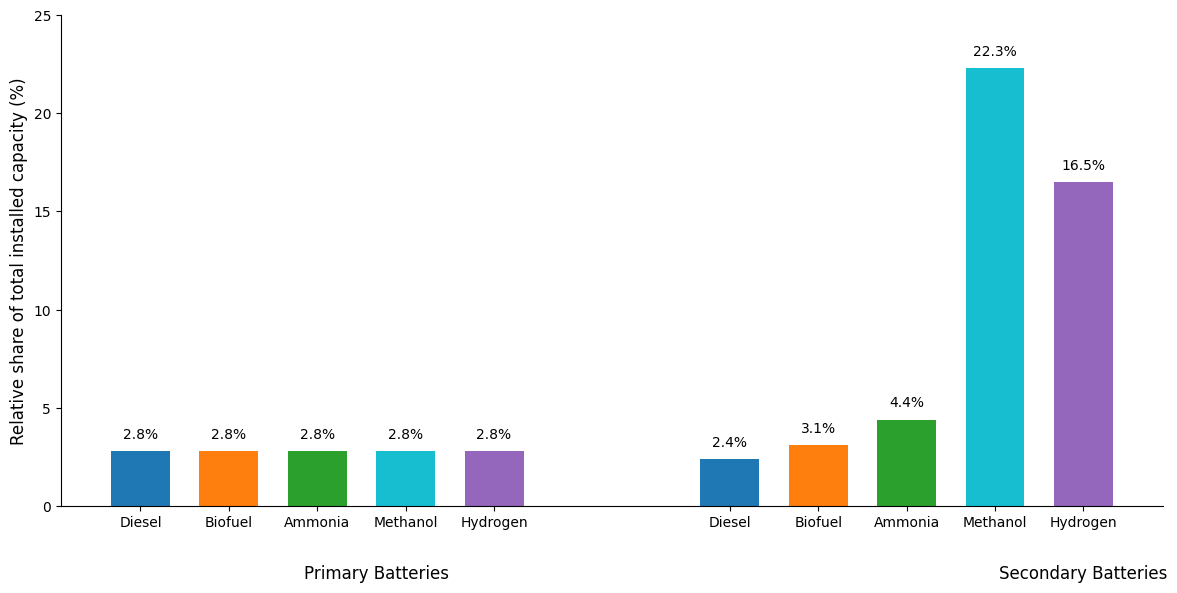

In [107]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Diesel', 'Biofuel', 'Ammonia','Methanol', 'Hydrogen']
primary_share = [2.8, 2.8, 2.8, 2.8, 2.8]  # Values for primary batteries
secondary_share = [2.4, 3.1, 4.4, 22.3, 16.5]  # Values for secondary batteries

x_primary = np.linspace(0, len(categories) - 2, len(categories))  # Closer spacing for primary batteries
x_secondary = x_primary + len(categories)   # Maintain space between primary and secondary groups

width = 0.5  # Bar width

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot primary batteries
bars_primary = ax.bar(
    x_primary, primary_share, width, label='Primary batteries',
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#17becf', '#9467bd']
)

# Plot secondary batteries
bars_secondary = ax.bar(
    x_secondary, secondary_share, width, label='Secondary batteries',
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#17becf', '#9467bd']
)

# Labeling
#ax.set_title('Role of battery storage in a clean fuel-based backup system', fontsize=14)
ax.set_ylabel('Relative share of total installed capacity (%)', fontsize=12)

# Define tick positions and labels
x_ticks = np.concatenate([x_primary, x_secondary])
x_labels = categories + categories
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=0, fontsize=10)  # Set horizontal labels

# Add labels under each group
ax.text(len(categories) / 2 - 0.5, -3, 'Primary Batteries', ha='center', va='top', fontsize=12)
ax.text(len(categories) + len(categories) / 2 + 0.5, -3, 'Secondary Batteries', ha='center', va='top', fontsize=12)

# Add percentage values above the bars with 1 decimal point
for bar in bars_primary:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

for bar in bars_secondary:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

# Remove grid lines
ax.yaxis.grid(False)

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0, 25)

# Adjust layout for labels
plt.tight_layout()
plt.show()

fig.savefig(r"C:\Users\jonas\OneDrive\Dokumente\EPFL École polytéchnique de Lausanne\Cours\MA4\MIT Master Thesis\Work\Results\Plots\battery_storage_role.png", dpi=300, bbox_inches='tight')



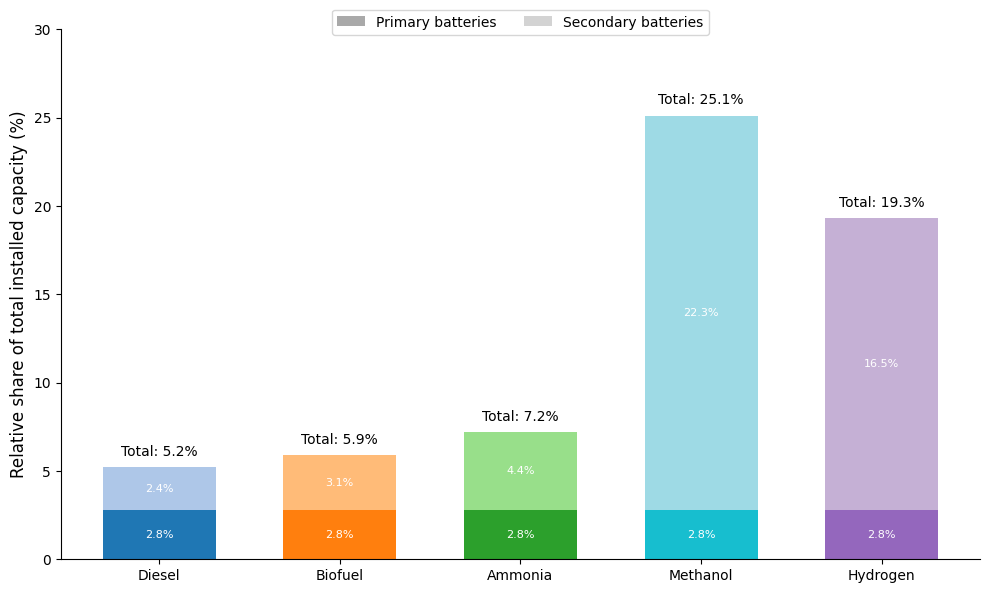

In [127]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Diesel', 'Biofuel', 'Ammonia', 'Methanol', 'Hydrogen']
primary_share = [2.8, 2.8, 2.8, 2.8, 2.8]  # Values for primary batteries
secondary_share = [2.4, 3.1, 4.4, 22.3, 16.5]  # Values for secondary batteries

x_positions = np.linspace(0, len(categories) - 1, len(categories)) * 0.8 

width = 0.5  # Bar width

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot primary batteries
bars_primary = ax.bar(
    x_positions, primary_share, width, label='Primary batteries',
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#17becf', '#9467bd']
)

# Plot secondary batteries stacked on top of primary batteries
bars_secondary = ax.bar(
    x_positions, secondary_share, width, bottom=primary_share, label='Secondary batteries',
    color=['#aec7e8', '#ffbb78', '#98df8a', '#9edae5', '#c5b0d5']
)

# Labeling
ax.set_ylabel('Relative share of total installed capacity (%)', fontsize=12)

# Define tick positions and labels
ax.set_xticks(x_positions)
ax.set_xticklabels(categories, rotation=0, fontsize=10)  # Set horizontal labels

# Add values to the bars, excluding labels smaller than 2%
for bars in [bars_primary, bars_secondary]:
    for bar in bars:
        height = bar.get_height()
        if height > 0.02:  # Exclude labels smaller than 2%
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f"{height:.1f}%",
                ha='center', va='center', fontsize=8, color='white'
            )

            # Add total values above the bars
for i, (primary, secondary) in enumerate(zip(primary_share, secondary_share)):
    total = primary + secondary
    ax.text(
        x_positions[i], total + 0.5, f"Total: {total:.1f}%",  # Position above the stacked bar
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Remove grid lines
ax.yaxis.grid(False)

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0, 30)

# Add legend
legend = ax.legend(
    ['Primary batteries', 'Secondary batteries'],
    loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=5
)

# Customize legend patch colors
legend.get_patches()[0].set_facecolor('darkgray')  # Primary batteries color
legend.get_patches()[1].set_facecolor('lightgray')  # Secondary batteries color


# Adjust layout for labels
plt.tight_layout()
plt.show()
fig.savefig(r"C:\Users\jonas\OneDrive\Dokumente\EPFL École polytéchnique de Lausanne\Cours\MA4\MIT Master Thesis\Work\Results\Plots\battery_storage_role.png", dpi=300, bbox_inches='tight')



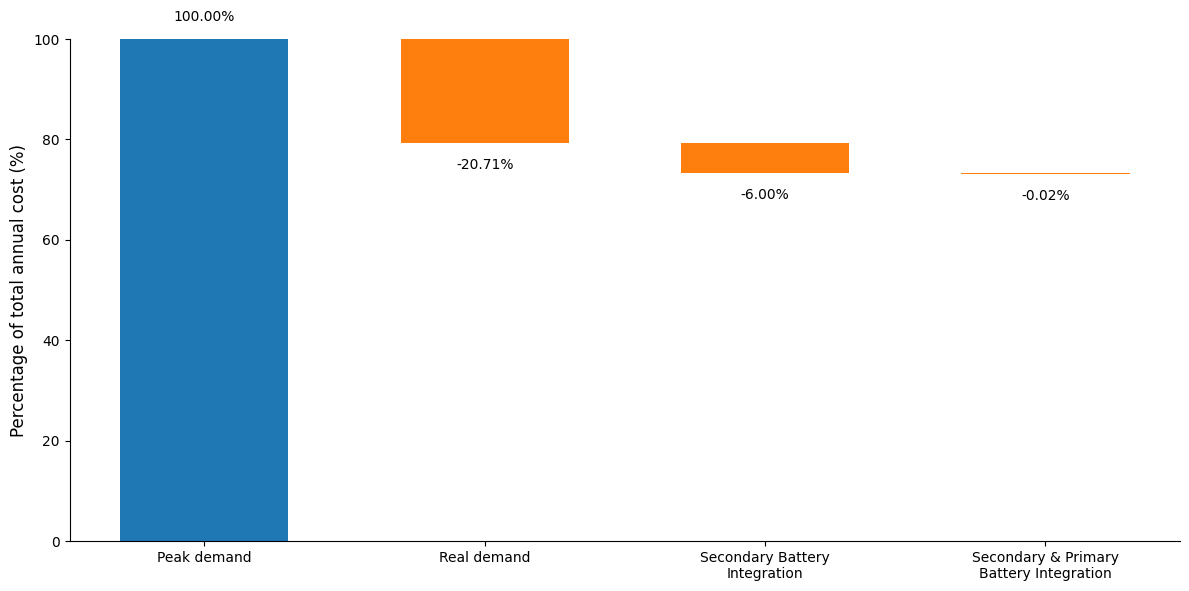

In [151]:
import matplotlib.pyplot as plt
import numpy as np
import textwrap

# Data
categories = [
    "Peak demand", 
    "Real demand", 
    "Secondary Battery Integration", 
    "Secondary & Primary Battery Integration"
]
values = [873622, -180904, -52406, -1620]  # Bar values

# Wrap category names after 15 characters
wrapped_categories = [textwrap.fill(category, 20) for category in categories]

# Convert values to percentages
reference_value = values[0]  # Use the first value as the reference (100%)
percentages = [v / reference_value * 100 for v in values]  # Calculate percentages

# Define bar colors
colors = ["#1f77b4", "#ff7f0e", "#ff7f0e", "#ff7f0e"]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars cumulatively
bottom = 0
bars = []
for i, (category, percentage, color) in enumerate(zip(categories, percentages, colors)):
    bars.append(
        ax.bar(
            category, percentage, bottom=bottom, color=color, width=0.6
        )
    )
    bottom += percentage  # Update the bottom for the next bar

# Add value labels to the bars
bottom = 0
for i, (bar, percentage) in enumerate(zip(bars, percentages)):
    height = bottom + percentage
    # Change the label for "Secondary & Primary Battery Integration"
    label = "-0.02%" if i == len(categories) - 1 else f"{percentage:.2f}%"
    ax.text(
        bar[0].get_x() + bar[0].get_width() / 2,  # Center of the bar
        height + (3 if percentage > 0 else -3),  # Reduced spacing between the bar and label
        label,  # Use the custom label for the last bar
        ha="center", va="bottom" if percentage > 0 else "top", fontsize=10
    )
    bottom += percentage  # Update the cumulative position

# Set axis labels and title
ax.set_ylabel("Percentage of total annual cost (%)", fontsize=12)
#ax.set_title("Analysis of Cost Savings: Impact of Demand-Based Sizing and Battery Integration", fontsize=14)

# Remove grid lines and top/right borders
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Set x-axis label rotation and wrapped text
ax.set_xticks(np.arange(len(categories)))
ax.set_xticklabels(wrapped_categories, rotation=0, fontsize=10)

# Adjust y-axis limits
ax.set_ylim(0, 100)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

fig.savefig(r"C:\Users\jonas\OneDrive\Dokumente\EPFL École polytéchnique de Lausanne\Cours\MA4\MIT Master Thesis\Work\Results\Plots\true_demand_sizing.png", dpi=300, bbox_inches='tight')


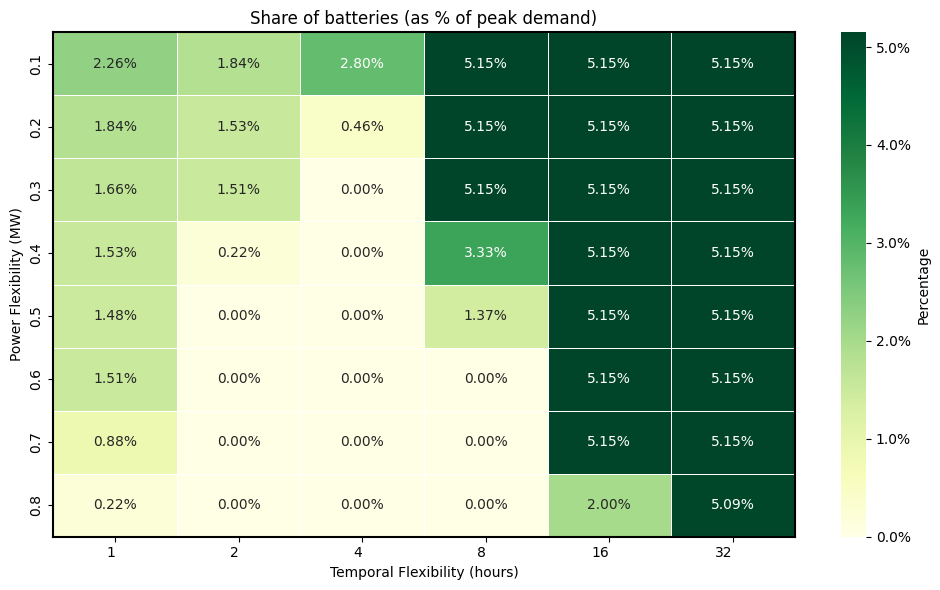

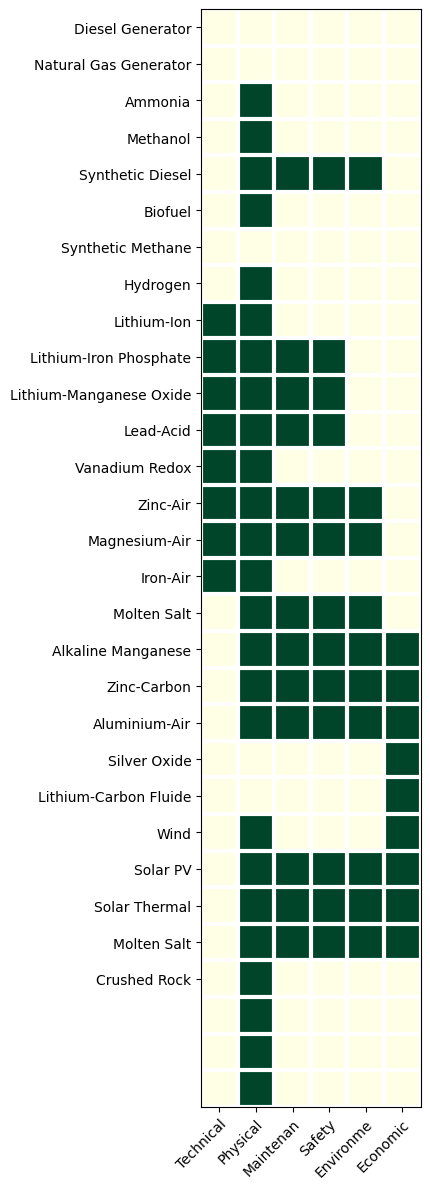

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the heatmap (replace with your actual data)
data = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0],
    [1, 1, 1, 1, 0, 0],
    [1, 1, 1, 1, 0, 0],
    [1, 1, 1, 1, 0, 0],
    [1, 1, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 0],
    [1, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 1],
    [0, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
])

# Labels for the x and y axes
x_labels = ["Technical", "Physical", "Maintenan", "Safety", "Environme", "Economic"]
y_labels = [
    "Diesel Generator",
    "Natural Gas Generator",
    "Ammonia",
    "Methanol",
    "Synthetic Diesel",
    "Biofuel",
    "Synthetic Methane",
    "Hydrogen",
    "Lithium-Ion",
    "Lithium-Iron Phosphate",
    "Lithium-Manganese Oxide",
    "Lead-Acid",
    "Vanadium Redox",
    "Zinc-Air",
    "Magnesium-Air",
    "Iron-Air",
    "Molten Salt",
    "Alkaline Manganese",
    "Zinc-Carbon",
    "Aluminium-Air",
    "Silver Oxide",
    "Lithium-Carbon Fluide",
    "Wind",
    "Solar PV",
    "Solar Thermal",
    "Molten Salt",
    "Crushed Rock",
]

# Create the heatmap
fig, ax = plt.subplots(figsize=(8, 12))  # Adjust figsize as needed
im = ax.imshow(data, cmap="YlGn")

# Set axis labels
ax.set_xticks(np.arange(len(x_labels)))
ax.set_yticks(np.arange(len(y_labels)))
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels) 


# Rotate x-axis labels if needed
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add grid lines
ax.set_xticks(np.arange(data.shape[1] + 1) - .5, minor=True)
ax.set_yticks(np.arange(data.shape[0] + 1) - .5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=False)


# Show the plot
plt.tight_layout()
plt.show()

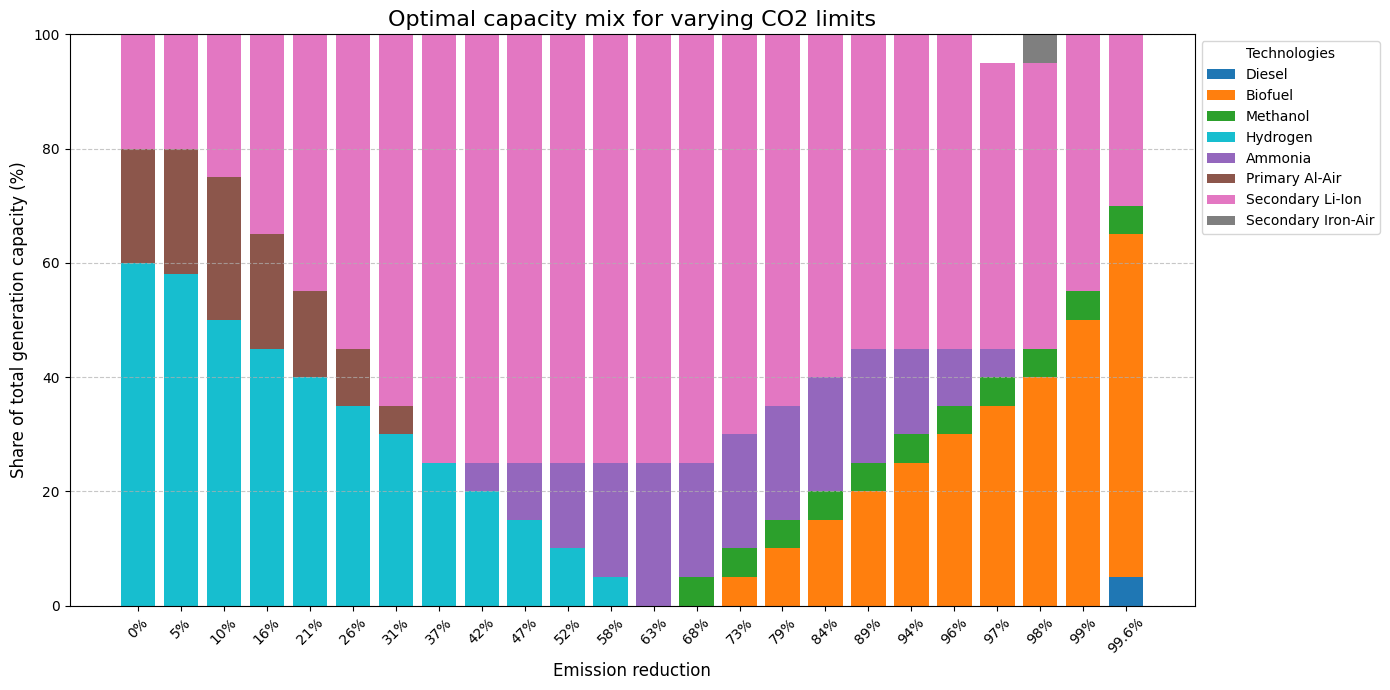

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Data
emission_reduction = [
    "0%", "5%", "10%", "16%", "21%", "26%", "31%", "37%", "42%", "47%", "52%", "58%", "63%",
    "68%", "73%", "79%", "84%", "89%", "94%", "96%", "97%", "98%", "99%", "99.6%"
]

categories = [
    "Diesel", "Biofuel", "Methanol", "Hydrogen", "Ammonia", 
    "Primary Al-Air", "Secondary Li-Ion", "Secondary Iron-Air"
]

# Random example data (share of each category in total generation capacity per emission reduction target)
data = np.array([
    [0, 0, 0, 60, 0, 20, 20, 0],   # 0%
    [0, 0, 0, 58, 0, 22, 20, 0],   # 5%
    [0, 0, 0, 50, 0, 25, 25, 0],   # 10%
    [0, 0, 0, 45, 0, 20, 35, 0],   # 16%
    [0, 0, 0, 40, 0, 15, 45, 0],   # 21%
    [0, 0, 0, 35, 0, 10, 55, 0],   # 26%
    [0, 0, 0, 30, 0, 5, 65, 0],    # 31%
    [0, 0, 0, 25, 0, 0, 75, 0],    # 37%
    [0, 0, 0, 20, 5, 0, 75, 0],    # 42%
    [0, 0, 0, 15, 10, 0, 75, 0],   # 47%
    [0, 0, 0, 10, 15, 0, 75, 0],   # 52%
    [0, 0, 0, 5, 20, 0, 75, 0],    # 58%
    [0, 0, 0, 0, 25, 0, 75, 0],    # 63%
    [0, 0, 5, 0, 20, 0, 75, 0],    # 68%
    [0, 5, 5, 0, 20, 0, 70, 0],    # 73%
    [0, 10, 5, 0, 20, 0, 65, 0],   # 79%
    [0, 15, 5, 0, 20, 0, 60, 0],   # 84%
    [0, 20, 5, 0, 20, 0, 55, 0],   # 89%
    [0, 25, 5, 0, 15, 0, 55, 0],   # 94%
    [0, 30, 5, 0, 10, 0, 55, 0],   # 96%
    [0, 35, 5, 0, 5, 0, 50, 0],    # 97%
    [0, 40, 5, 0, 0, 0, 50, 5],    # 98%
    [0, 50, 5, 0, 0, 0, 45, 5],    # 99%
    [5, 60, 5, 0, 0, 0, 30, 10]    # 99.6%
])

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))
bottom = np.zeros(len(emission_reduction))  # Start at 0 for stacking

colors = [
    '#1f77b4',  # Diesel
    '#ff7f0e',  # Biofuel
    '#2ca02c',  # Methanol
    '#17becf',  # Hydrogen
    '#9467bd',  # Ammonia
    '#8c564b',  # Primary Al-Air
    '#e377c2',  # Secondary Li-Ion
    '#7f7f7f',  # Secondary Iron-Air
]

for i, category in enumerate(categories):
    ax.bar(emission_reduction, data[:, i], label=category, bottom=bottom, color=colors[i])
    bottom += data[:, i]  # Update bottom for stacking

# Customization
ax.set_title("Optimal capacity mix for varying CO2 limits", fontsize=16)
ax.set_ylabel("Share of total generation capacity (%)", fontsize=12)
ax.set_xlabel("Emission reduction", fontsize=12)
ax.set_ylim(0, 100)
ax.set_xticks(np.arange(len(emission_reduction)))
ax.set_xticklabels(emission_reduction, rotation=45, fontsize=10)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Technologies", fontsize=10)

# Grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()
plt.show()


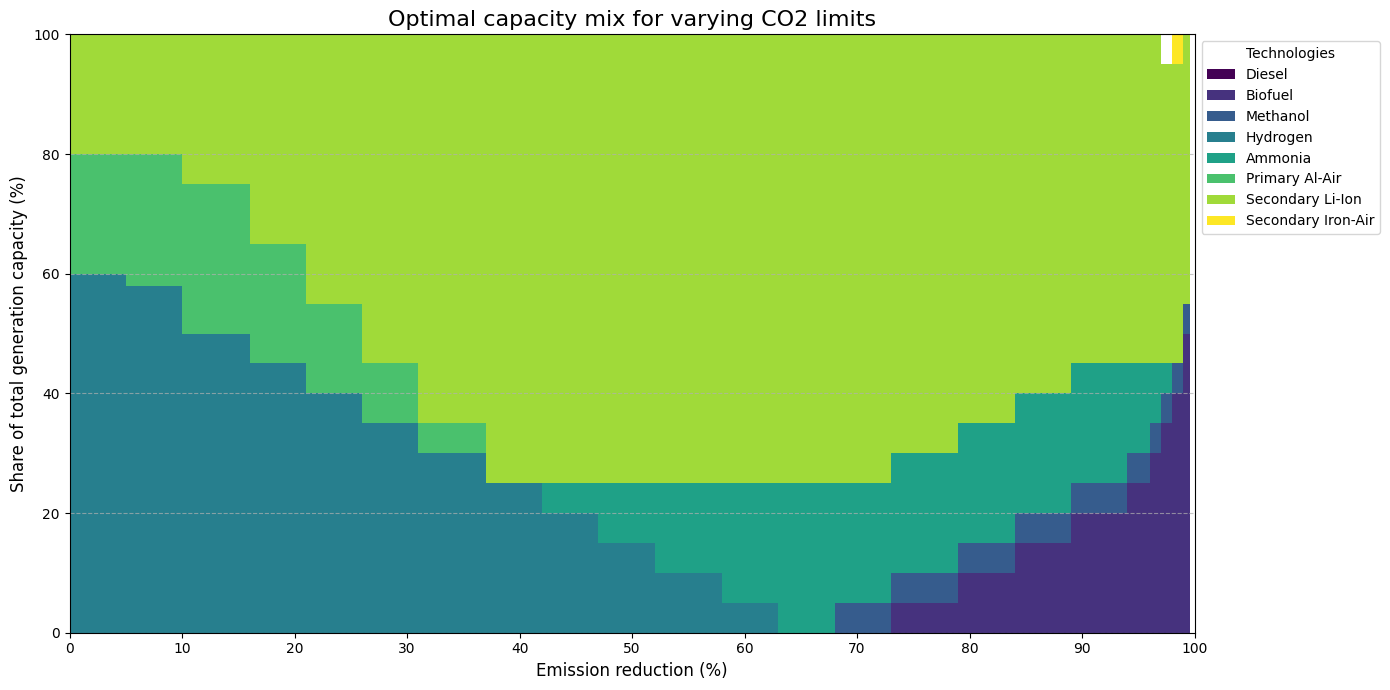

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Data
emission_reduction = [
    0, 5, 10, 16, 21, 26, 31, 37, 42, 47, 52, 58, 63,
    68, 73, 79, 84, 89, 94, 96, 97, 98, 99, 99.6
]  # Continuous values for x-axis

categories = [
    "Diesel", "Biofuel", "Methanol", "Hydrogen", "Ammonia", 
    "Primary Al-Air", "Secondary Li-Ion", "Secondary Iron-Air"
]

# Example data: share of each category in total generation capacity per emission reduction target
data = np.array([
    [0, 0, 0, 60, 0, 20, 20, 0],   # 0%
    [0, 0, 0, 58, 0, 22, 20, 0],   # 5%
    [0, 0, 0, 50, 0, 25, 25, 0],   # 10%
    [0, 0, 0, 45, 0, 20, 35, 0],   # 16%
    [0, 0, 0, 40, 0, 15, 45, 0],   # 21%
    [0, 0, 0, 35, 0, 10, 55, 0],   # 26%
    [0, 0, 0, 30, 0, 5, 65, 0],    # 31%
    [0, 0, 0, 25, 0, 0, 75, 0],    # 37%
    [0, 0, 0, 20, 5, 0, 75, 0],    # 42%
    [0, 0, 0, 15, 10, 0, 75, 0],   # 47%
    [0, 0, 0, 10, 15, 0, 75, 0],   # 52%
    [0, 0, 0, 5, 20, 0, 75, 0],    # 58%
    [0, 0, 0, 0, 25, 0, 75, 0],    # 63%
    [0, 0, 5, 0, 20, 0, 75, 0],    # 68%
    [0, 5, 5, 0, 20, 0, 70, 0],    # 73%
    [0, 10, 5, 0, 20, 0, 65, 0],   # 79%
    [0, 15, 5, 0, 20, 0, 60, 0],   # 84%
    [0, 20, 5, 0, 20, 0, 55, 0],   # 89%
    [0, 25, 5, 0, 15, 0, 55, 0],   # 94%
    [0, 30, 5, 0, 10, 0, 55, 0],   # 96%
    [0, 35, 5, 0, 5, 0, 50, 0],    # 97%
    [0, 40, 5, 0, 0, 0, 50, 5],    # 98%
    [0, 50, 5, 0, 0, 0, 45, 5],    # 99%
    [5, 60, 5, 0, 0, 0, 30, 10]    # 99.6%
])

# Calculate bar widths
widths = np.diff(emission_reduction, append=emission_reduction[-1])  # Ensure last bar has width

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))
bottom = np.zeros(len(emission_reduction))  # Start at 0 for stacking

# Generate a color palette from viridis
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

# Plot stacked bars with adjusted widths
for i, category in enumerate(categories):
    for j in range(len(emission_reduction)):
        ax.bar(
            emission_reduction[j], data[j, i], 
            width=widths[j], label=category if j == 0 else "", 
            bottom=bottom[j], color=colors[i], align='edge', edgecolor='none'
        )
    bottom += data[:, i]  # Update bottom for stacking

# Customization
ax.set_title("Optimal capacity mix for varying CO2 limits", fontsize=16)
ax.set_ylabel("Share of total generation capacity (%)", fontsize=12)
ax.set_xlabel("Emission reduction (%)", fontsize=12)
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

# Format x-axis to show intermediate emission reductions
ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Technologies", fontsize=10)

# Grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()
plt.show()


0 Run Number Emission Reduction    Diesel   Biofuel Methanol Hydrogen Ammonia  \
1        1.0                0.1  2.083101       0.0      0.0      0.0     0.0   
2        2.0                0.2  2.083101       0.0      0.0      0.0     0.0   
3        3.0                0.3  2.083101       0.0      0.0      0.0     0.0   
4        4.0           0.475064  2.083101       0.0      0.0      0.0     0.0   
5        5.0           0.524236  1.770426  0.311115      0.0      0.0     0.0   

0 Primary Al-Air Secondary Li-Ion Secondary Iron-Air Solar Flexibility  \
1       0.054031              0.0           0.057405   0.0         0.0   
2       0.054031              0.0           0.057405   0.0         0.0   
3       0.054031              0.0           0.057405   0.0         0.0   
4       0.054031              0.0           0.057405   0.0         0.0   
5        0.01021              0.0           0.102786   0.0         0.0   

0 Total Capacity   Total Cost  
1       2.194537  165180.1223  
2   

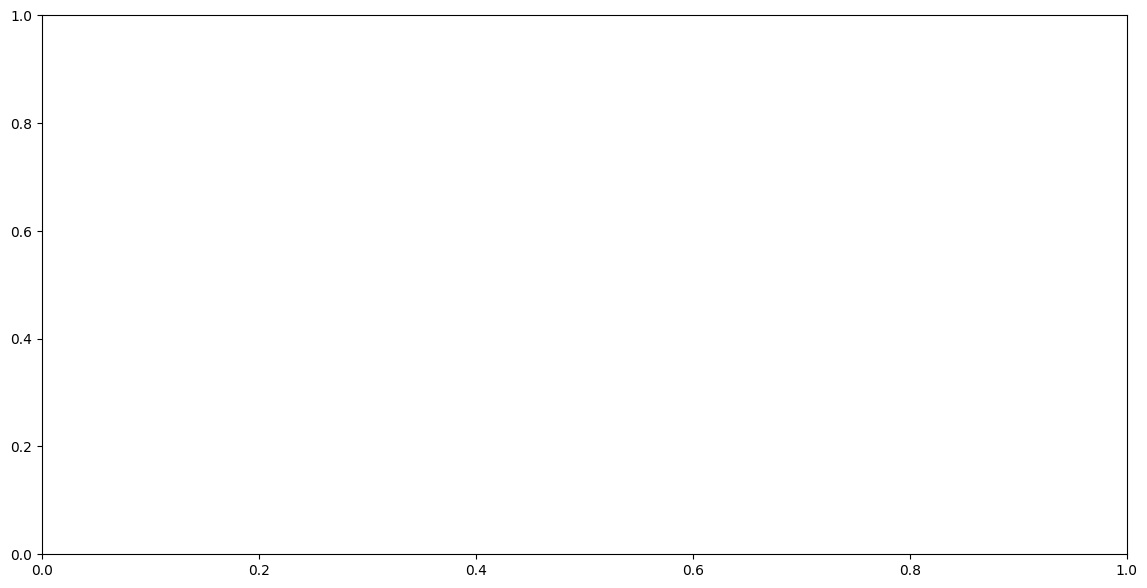

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
file_path = "pareto_plot_decarb.csv"
data = pd.read_csv(file_path, header=None)  # Load without assuming header

# Transpose the data to treat each row as a different data series
data = data.T

# Set the first row as the column names
data.columns = data.iloc[0]
data = data[1:]

# Inspect the data after transposing
print(data.head())

# Extract relevant columns
emission_reduction = data["Emission Reduction"]  # Emission Reduction as decimal
categories = ["Diesel", "Biofuel", "Methanol", "Hydrogen", "Ammonia", "Primary Al-Air", "Secondary Li-Ion", "Secondary Iron-Air"]
total_cost = data["Total Cost"]

numeric_columns = [
    "Emission Reduction", "Diesel", "Biofuel", "Methanol", "Hydrogen", 
    "Ammonia", "Primary Al-Air", "Secondary Li-Ion", "Secondary Iron-Air", 
    "Total Cost", "Total Capacity"
]

# Apply pd.to_numeric
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Prepare data for stacking
stack_data = data[categories]
stack_data_percentage = stack_data.div(stack_data.sum(axis=1), axis=0) * 100  # Convert to percentages

# Calculate bar widths based on emission reduction differences
x_values = emission_reduction
widths = np.diff(x_values, append=x_values.iloc[-1])

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot stacked bars
bottom = np.zeros(len(x_values))
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#17becf', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f'
]
print(data.dtypes)

0 Run Number Emission Reduction    Diesel   Biofuel Methanol Hydrogen Ammonia  \
1        1.0                0.1  2.083101       0.0      0.0      0.0     0.0   
2        2.0                0.2  2.083101       0.0      0.0      0.0     0.0   
3        3.0                0.3  2.083101       0.0      0.0      0.0     0.0   
4        4.0           0.475064  2.083101       0.0      0.0      0.0     0.0   
5        5.0           0.524236  1.770426  0.311115      0.0      0.0     0.0   

0 Primary Al-Air Secondary Li-Ion Secondary Iron-Air Solar Flexibility  \
1       0.054031              0.0           0.057405   0.0         0.0   
2       0.054031              0.0           0.057405   0.0         0.0   
3       0.054031              0.0           0.057405   0.0         0.0   
4       0.054031              0.0           0.057405   0.0         0.0   
5        0.01021              0.0           0.102786   0.0         0.0   

0 Total Capacity   Total Cost  
1       2.194537  165180.1223  
2   

KeyError: 0

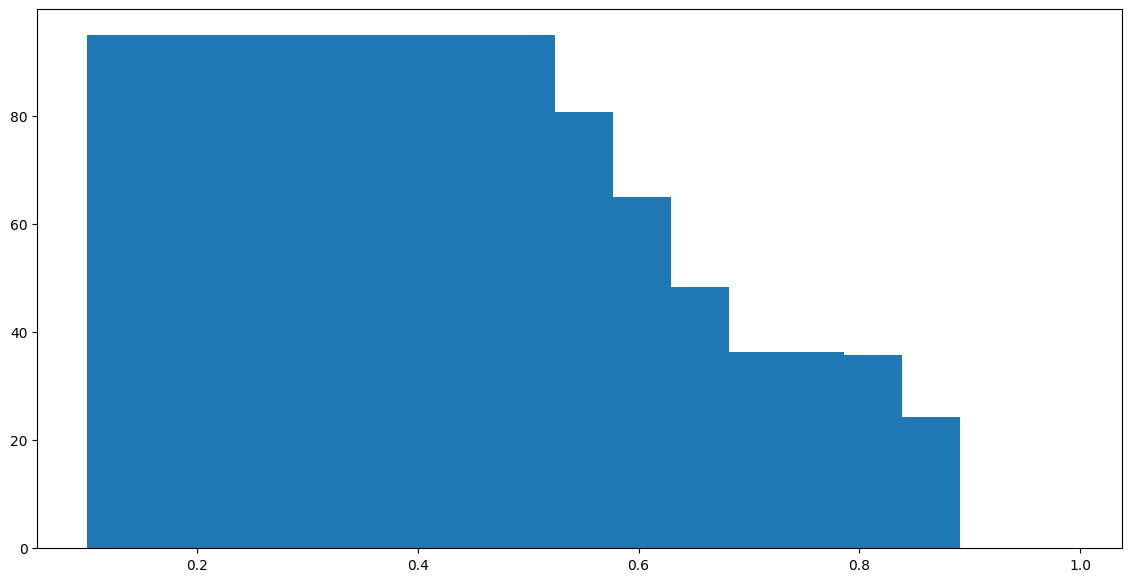

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
file_path = "pareto_plot_decarb.csv"
data = pd.read_csv(file_path, header=None)  # Load without assuming header

# Transpose the data to treat each row as a different data series
data = data.T

# Set the first row as the column names
data.columns = data.iloc[0]
data = data[1:]

# Inspect the data after transposing
print(data.head())

# Extract relevant columns
emission_reduction = data["Emission Reduction"]  # Emission Reduction as decimal
categories = ["Diesel", "Biofuel", "Methanol", "Hydrogen", "Ammonia", "Primary Al-Air", "Secondary Li-Ion", "Secondary Iron-Air"]
total_cost = data["Total Cost"]

numeric_columns = [
    "Emission Reduction", "Diesel", "Biofuel", "Methanol", "Hydrogen", 
    "Ammonia", "Primary Al-Air", "Secondary Li-Ion", "Secondary Iron-Air", 
    "Total Cost", "Total Capacity"
]

# Apply pd.to_numeric
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Prepare data for stacking
stack_data = data[categories]
stack_data_percentage = stack_data.div(stack_data.sum(axis=1), axis=0) * 100  # Convert to percentages

# Calculate bar widths based on emission reduction differences
x_values = emission_reduction
widths = np.diff(x_values, append=x_values.iloc[-1])

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot stacked bars
bottom = np.zeros(len(x_values))
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#17becf', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f'
]

for i, category in enumerate(categories):
    for j in range(len(x_values)):
        ax1.bar(
            x_values.iloc[j], stack_data_percentage[category].iloc[j], 
            width=widths[j], color=colors[i], 
            bottom=bottom[j], align='edge', edgecolor='none'
        )
    bottom += stack_data_percentage[category]

# Add a secondary y-axis for Total Cost
ax2 = ax1.twinx()
ax2.plot(x_values, total_cost, color='black', marker='o', label='Total Cost')
ax2.set_ylabel("Total Cost (units)", fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Labels and formatting
ax1.set_title("Capacity Mix and System Cost vs. Emission Reduction", fontsize=16)
ax1.set_xlabel("Emission Reduction", fontsize=12)  # Emission Reduction as decimal
ax1.set_ylabel("Share of Total Generation Capacity (%)", fontsize=12)
ax1.set_xlim(x_values.iloc[0], x_values.iloc[-1])
ax1.set_ylim(0, 100)

# Add grid and legend
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.legend(categories + ['Total Cost'], loc='upper left', bbox_to_anchor=(1, 1), title="Technologies")

# Show plot
plt.tight_layout()
plt.show()



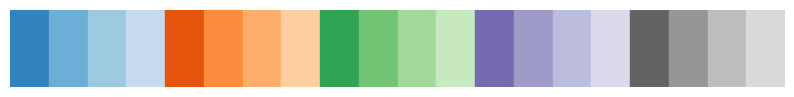

In [1]:
import matplotlib.pyplot as plt

# Display the colors in tab20c
colors = plt.cm.tab20c.colors

# Plot the colors
fig, ax = plt.subplots(figsize=(10, 1))
for i, color in enumerate(colors):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))
ax.set_xlim(0, 20)
ax.set_ylim(0, 1)
ax.axis('off')
plt.show()

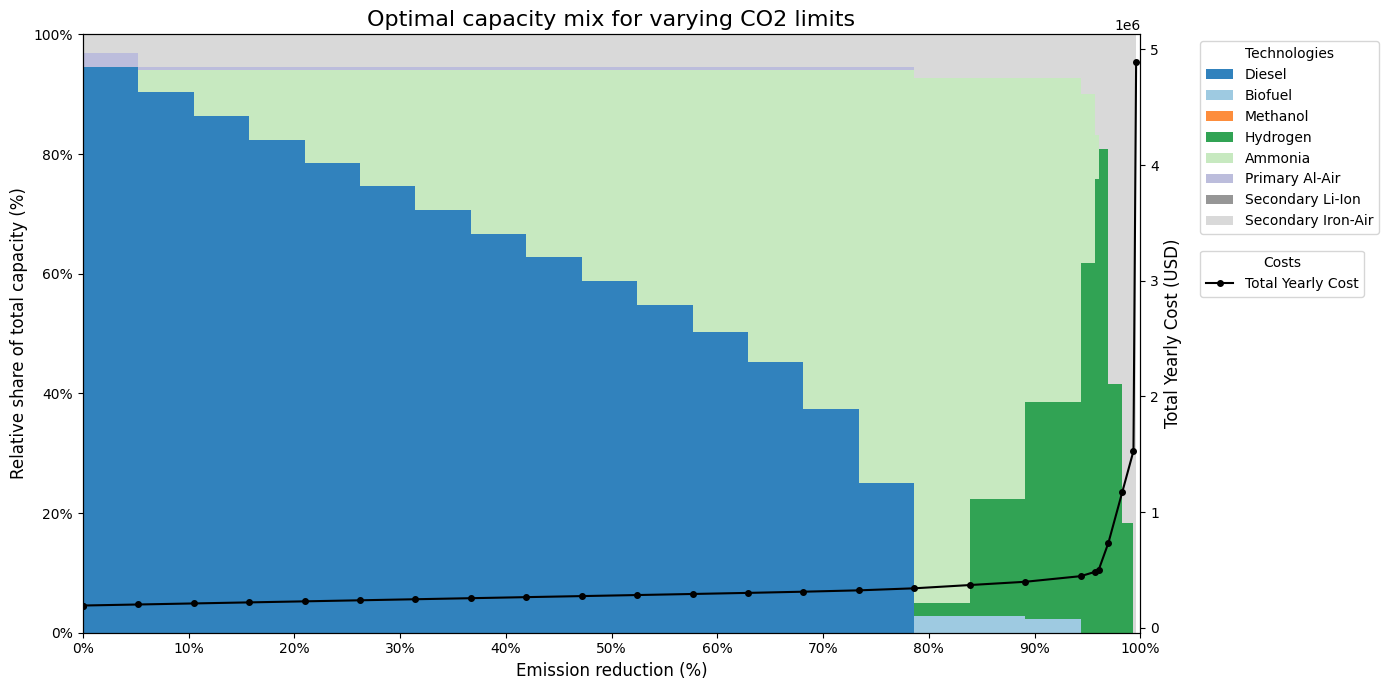

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Load the CSV data into a DataFrame
file_path = 'pareto_plot_decarb.csv'  # Replace with the correct path to your file
data = pd.read_csv(file_path)

# Transpose and clean the data for plotting
data_transposed = data.set_index('Run Number').T

# Extract emission reduction values
emission_reduction = data_transposed['Emission Reduction'].astype(float).values

# Extract category names and corresponding data
categories = data['Run Number'][1:9]  # Select first 8 categories (Diesel to Secondary Iron-Air)
data_values = data_transposed.iloc[:, 1:9].astype(float).values.T  # Corresponding data for these categories

# Extract Total Cost values
total_cost = data_transposed['Total Cost'].astype(float).values

# Normalize data values to get relative shares (in percentages)
data_sums = data_values.sum(axis=0)  # Total capacities for each emission reduction
data_values = (data_values / data_sums) * 100  # Normalize to percentages

# Calculate bar widths based on consecutive emission reduction differences
widths = np.diff(emission_reduction, append=emission_reduction[-1])  # Last bar extends to the end

# Adjust the first bar to start at 0
emission_reduction = np.insert(emission_reduction, 0, 0)
widths = np.insert(widths, 0, emission_reduction[1])  # Width of the first bar is the distance to the first value
data_values = np.insert(data_values, 0, data_values[:, 0], axis=1)  # Extend the first value
total_cost = np.insert(total_cost, 0, total_cost[0])  # Extend the first Total Cost value

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))
bottom = np.zeros(len(emission_reduction))  # Start at 0 for stacking

# Generate a color palette from tab20c
colors = list(plt.cm.tab20c(np.linspace(0, 1, len(categories))))

# Plot stacked bars with adjusted widths
for i, category in enumerate(categories):
    ax.bar(
        emission_reduction, data_values[i], 
        width=widths, label=category, 
        bottom=bottom, color=colors[i], align='edge', edgecolor='none'
    )
    bottom += data_values[i]  # Update bottom for stacking

# Secondary y-axis for Total Cost
ax2 = ax.twinx()
ax2.plot(emission_reduction, total_cost, color='black', marker='o', markersize=4, label="Total Yearly Cost")
ax2.set_ylabel("Total Yearly Cost (USD)", fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Customization
ax.set_title("Optimal capacity mix for varying CO2 limits", fontsize=16)
ax.set_ylabel("Relative share of total capacity (%)", fontsize=12)
ax.set_xlabel("Emission reduction (%)", fontsize=12)
ax.set_xlim(0, 1)
ax.set_ylim(0, 100)

# Format x-axis and y-axis to show percentages
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x * 100:.0f}%'))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}%'))

# Format x-axis to show intermediate emission reductions
ax.set_xticks(np.linspace(0, 1, 11))  # Generate ticks from 0 to 1

# Legend for the bar chart (Technologies)
bars_legend = ax.legend(
    loc='upper left', bbox_to_anchor=(1.05, 1), title="Technologies", fontsize=10
)

# Legend for the line chart (Costs)
cost_legend = ax2.legend(
    loc='upper left', bbox_to_anchor=(1.05, 0.65), title="Costs", fontsize=10
)

# Tight layout for better spacing
plt.tight_layout()
plt.show()




In [41]:
francesco_colors = {
    'Diesel': '#789cc4',            # Blue
    'Biofuel': '#d0d4ec',           # Gold
    'Methanol': '#f4aa72',          # Red
    'Hydrogen': '#ffb356',          # Green
    'Ammonia': '#f8d1a8',           # Purple
    'Primary Al-Air': '#d6746f',    # Dark Red
    'Secondary Li-Ion': '#86bb78',  # Teal
    'Secondary Iron-Air': '#c2e7b3' # Gray
}

good_colors_manual_1 = {
    'Diesel': '#b0b0b0',           #969696
    'Biofuel': '#9ecae1',        
    'Methanol': '#bcbddc',          
    'Hydrogen': '#3182bd',         
    'Ammonia': '#c7e9c0',           
    'Primary Al-Air': '#fd8d3c',    
    'Secondary Li-Ion': '#FFD700',    
    'Secondary Iron-Air': '#31a354' 
} 

good_colors_manual_2 = {
    'Diesel': '#008080',         
    'Biofuel': '#9ecae1',        
    'Methanol': '#a787ac',          
    'Hydrogen': '#3182bd',         
    'Ammonia': '#c7e9c0',           
    'Primary Al-Air': '#ff8c52',    
    'Secondary Li-Ion': '#ffb51c',  
    'Secondary Iron-Air': '#31a354' 
} 


good_colors_schnidrig_1 = {
    'Diesel': '#a5a5a5',           #969696
    'Biofuel': '#ceebb8',        #
    'Methanol': '#bcbddc',          
    'Hydrogen': '#66a6cd',      #   
    'Ammonia': '#95d4bb',           #
    'Primary Al-Air': '#df6f7b',    #
    'Secondary Li-Ion': '#f79976',  #
    'Secondary Iron-Air': '#fdce92' #
} 

# Define the desired order of technologies
desired_order_schnidrig = [
    "Diesel", "Hydrogen", "Ammonia", "Biofuel", 
    "Methanol", "Primary Al-Air", "Secondary Li-Ion", "Secondary Iron-Air"
]


desired_order_manual_2 = [
    "Diesel", "Hydrogen", "Biofuel", "Ammonia",  
    "Methanol", "Primary Al-Air", "Secondary Li-Ion", "Secondary Iron-Air"
]


Categories and assigned colors:
Diesel: #008080
Biofuel: #9ecae1
Methanol: #a787ac
Hydrogen: #3182bd
Ammonia: #c7e9c0
Primary Al-Air: #ff8c52
Secondary Li-Ion: #ffb51c
Secondary Iron-Air: #31a354


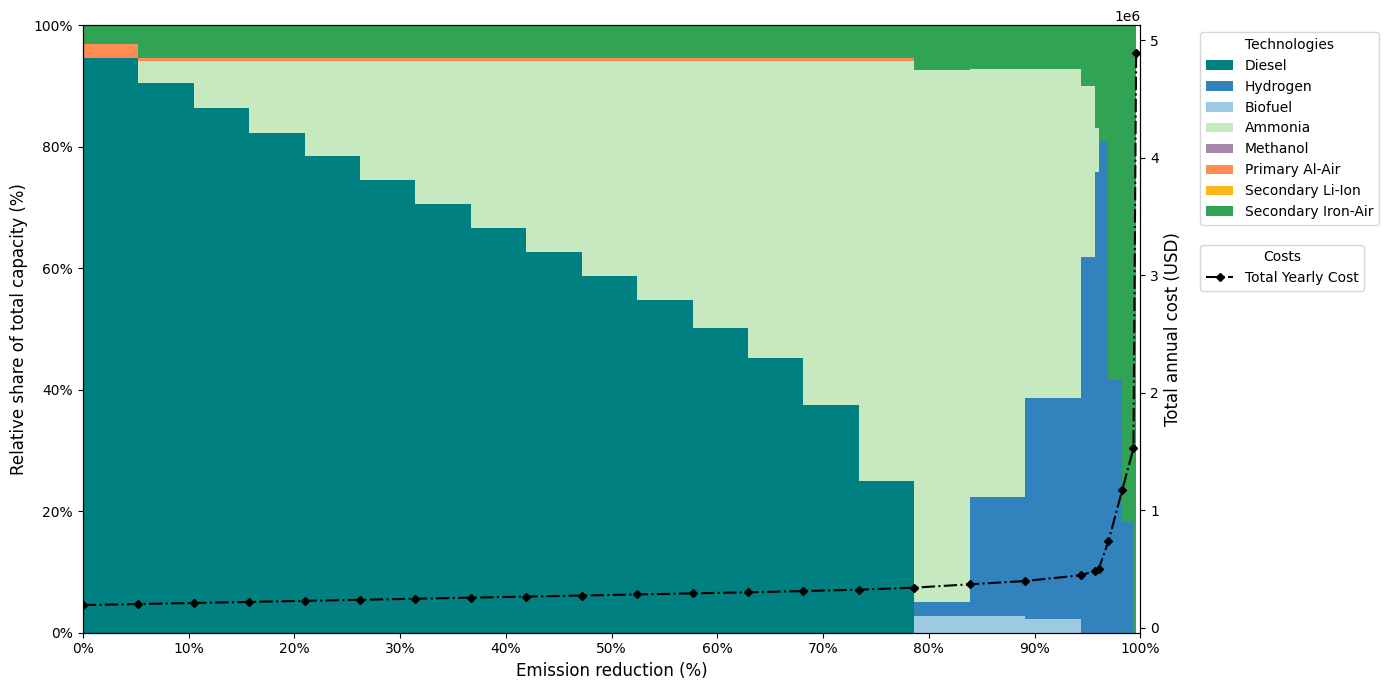

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter
import seaborn as sns

technology_colors = good_colors_manual_2
desired_order = desired_order_manual_2

# Load the CSV data into a DataFrame
file_path = 'pareto_plot_decarb.csv'  # Replace with the correct path to your file
data = pd.read_csv(file_path)

# Transpose and clean the data for plotting
data_transposed = data.set_index('Run Number').T

# Extract emission reduction values
emission_reduction = data_transposed['Emission Reduction'].astype(float).values

# Extract category names and corresponding data
categories = data['Run Number'][1:9]  # Select first 8 categories (Diesel to Secondary Iron-Air)
data_values = data_transposed.iloc[:, 1:9].astype(float).values.T  # Corresponding data for these categories

# Extract Total Cost values
total_cost = data_transposed['Total Cost'].astype(float).values

# Normalize data values to get relative shares (in percentages)
data_sums = data_values.sum(axis=0)  # Total capacities for each emission reduction
data_values = (data_values / data_sums) * 100  # Normalize to percentages

# Calculate bar widths based on consecutive emission reduction differences
widths = np.diff(emission_reduction, append=emission_reduction[-1])  # Last bar extends to the end

# Adjust the first bar to start at 0
emission_reduction = np.insert(emission_reduction, 0, 0)
widths = np.insert(widths, 0, emission_reduction[1])  # Width of the first bar is the distance to the first value
data_values = np.insert(data_values, 0, data_values[:, 0], axis=1)  # Extend the first value
total_cost = np.insert(total_cost, 0, total_cost[0])  # Extend the first Total Cost value

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))
bottom = np.zeros(len(emission_reduction))  # Start at 0 for stacking

# Debugging: Print categories and their assigned colors
print("Categories and assigned colors:")
for category in categories:
    color = technology_colors.get(category)  # Default to light gray if not in dictionary
    print(f"{category}: {color}")

# Plot stacked bars with manually defined colors
for i, category in enumerate(categories):
    color = technology_colors.get(category, '#d3d3d3')  # Default to light gray if not in dictionary
    ax.bar(
        emission_reduction, data_values[i], 
        width=widths, label=category, 
        bottom=bottom, color=color, align='edge', edgecolor='none'
    )
    bottom += data_values[i]  # Update bottom for stacking

# Secondary y-axis for Total Cost
ax2 = ax.twinx()
ax2.plot(emission_reduction, total_cost, color='black', marker='D', linestyle='-.', markersize=4, label="Total Yearly Cost") #  marker='^', linestyle=':', marker='s', linestyle='-',
ax2.set_ylabel("Total annual cost (USD)", fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Customization
#ax.set_title("Optimal capacity mix for varying CO2 limits", fontsize=16)
ax.set_ylabel("Relative share of total capacity (%)", fontsize=12)
ax.set_xlabel("Emission reduction (%)", fontsize=12)
ax.set_xlim(0, 1)
ax.set_ylim(0, 100)

# Format x-axis and y-axis to show percentages
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x * 100:.0f}%'))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}%'))

# Format x-axis to show intermediate emission reductions
ax.set_xticks(np.linspace(0, 1, 11))  # Generate ticks from 0 to 1
# Retrieve current legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Sort handles and labels according to the desired order
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: desired_order.index(x[1]))
sorted_handles, sorted_labels = zip(*sorted_handles_labels)

# Legend for the bar chart (Technologies)
bars_legend = ax.legend(
    handles=sorted_handles, labels=sorted_labels,
    loc='upper left', bbox_to_anchor=(1.05, 1), title="Technologies", fontsize=10
)

# Legend for the line chart (Costs)
cost_legend = ax2.legend(
    loc='upper left', bbox_to_anchor=(1.05, 0.65), title="Costs", fontsize=10
)

# Tight layout for better spacing
plt.tight_layout()
plt.show()


Categories and assigned colors:
Diesel: #008080
Biofuel: #9ecae1
Methanol: #a787ac
Hydrogen: #3182bd
Ammonia: #c7e9c0
Primary Al-Air: #ff8c52
Secondary Li-Ion: #ffb51c
Secondary Iron-Air: #31a354


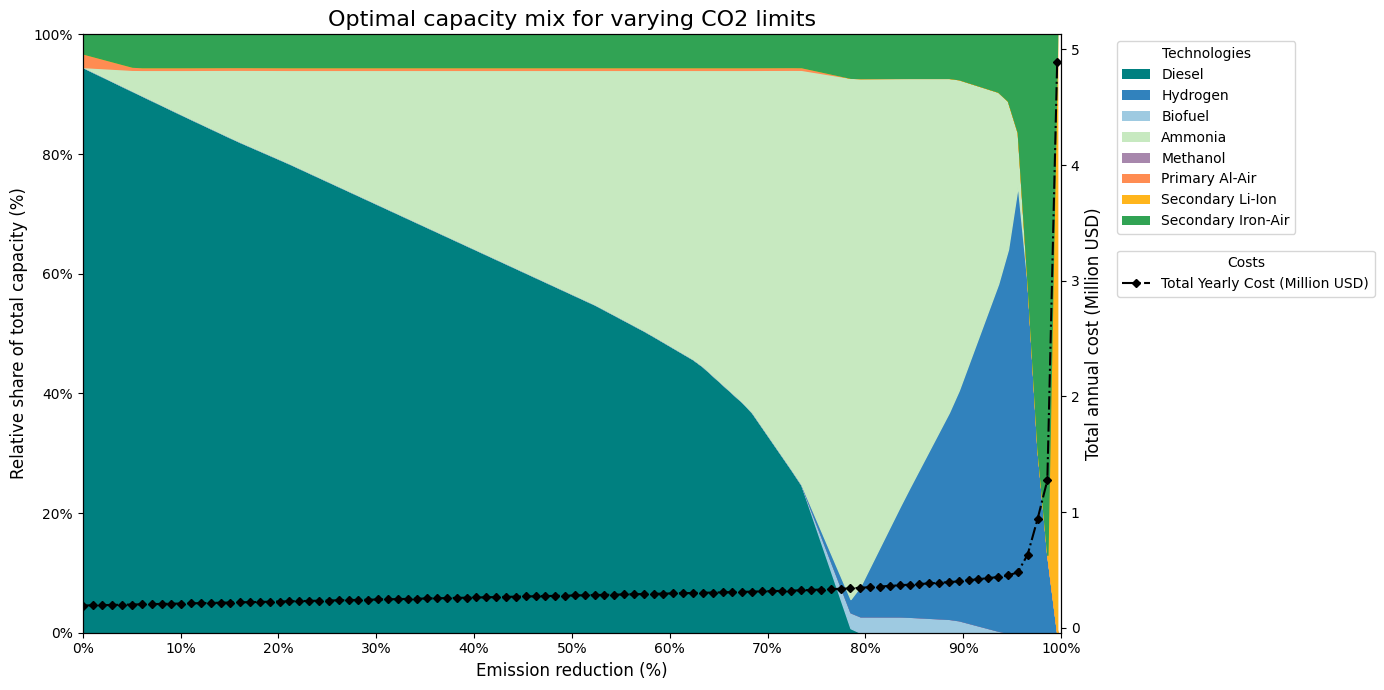

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter
from scipy.interpolate import interp1d

# Load the CSV data into a DataFrame
file_path = 'pareto_plot_decarb.csv'  # Replace with the correct path to your file
data = pd.read_csv(file_path)

# Transpose and clean the data for plotting
data_transposed = data.set_index('Run Number').T

# Extract emission reduction values
emission_reduction = data_transposed['Emission Reduction'].astype(float).values

# Extract category names and corresponding data
categories = data['Run Number'][1:9]  # Select first 8 categories (Diesel to Secondary Iron-Air)
data_values = data_transposed.iloc[:, 1:9].astype(float).values.T  # Corresponding data for these categories

# Extract Total Cost values
total_cost = data_transposed['Total Cost'].astype(float).values

# Normalize data values to get relative shares (in percentages)
data_sums = data_values.sum(axis=0)  # Total capacities for each emission reduction
data_values = (data_values / data_sums) * 100  # Normalize to percentages

num_points = 100  # Adjust this value as needed (e.g., 100 for coarse, 1000 for fine)

# Interpolate data for smoother plotting
fine_emission_reduction = np.linspace(emission_reduction.min(), emission_reduction.max(), num_points)
data_values_interpolated = np.zeros((data_values.shape[0], len(fine_emission_reduction)))

# Use linear interpolation for each category
for i in range(data_values.shape[0]):
    f_interp = interp1d(emission_reduction, data_values[i], kind='linear')
    data_values_interpolated[i] = f_interp(fine_emission_reduction)

# Interpolate total cost
f_cost_interp = interp1d(emission_reduction, total_cost / 1_000_000, kind='linear')  # Convert to Million USD
total_cost_interpolated = f_cost_interp(fine_emission_reduction)

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))
bottom = np.zeros(len(fine_emission_reduction))  # Start at 0 for stacking

# Debugging: Print categories and their assigned colors
print("Categories and assigned colors:")
for category in categories:
    color = technology_colors.get(category)  # Default to light gray if not in dictionary
    print(f"{category}: {color}")

# Plot stacked areas using fill_between
for i, category in enumerate(categories):
    color = technology_colors.get(category, '#d3d3d3')  # Default to light gray if not in dictionary
    ax.fill_between(
        fine_emission_reduction,
        bottom,
        bottom + data_values_interpolated[i],
        label=category,
        color=color
    )
    bottom += data_values_interpolated[i]  # Update bottom for stacking

# Secondary y-axis for Total Cost
ax2 = ax.twinx()
ax2.plot(
    fine_emission_reduction, total_cost_interpolated, 
    color='black', marker='D', linestyle='-.', markersize=4, label="Total Yearly Cost (Million USD)"
)
ax2.set_ylabel("Total annual cost (Million USD)", fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Customization
#ax.set_title("Optimal capacity mix for varying CO2 limits", fontsize=16)
ax.set_ylabel("Relative share of total capacity (%)", fontsize=12)
ax.set_xlabel("Emission reduction (%)", fontsize=12)
ax.set_xlim(0, 1)
ax.set_ylim(0, 100)

# Format x-axis and y-axis to show percentages
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x * 100:.0f}%'))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}%'))

# Format x-axis to show intermediate emission reductions
ax.set_xticks(np.linspace(0, 1, 11))  # Generate ticks from 0 to 1

# Legend for the bar chart (Technologies)
bars_legend = ax.legend(
    handles=sorted_handles, labels=sorted_labels,
    loc='upper left', bbox_to_anchor=(1.05, 1), title="Technologies", fontsize=10
)

# Legend for the line chart (Costs)
cost_legend = ax2.legend(
    loc='upper left', bbox_to_anchor=(1.05, 0.65), title="Costs", fontsize=10
)

# Tight layout for better spacing
plt.tight_layout()
plt.show()


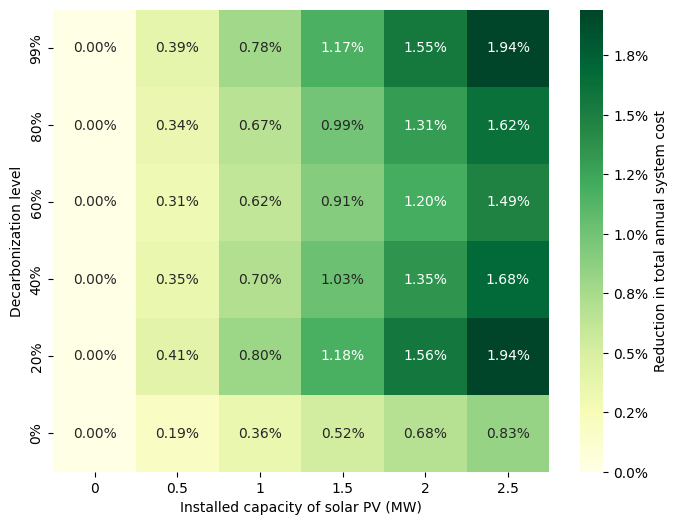

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Your data as a NumPy array
data = np.array([
    [0, 0.003884, 0.007769, 0.011653, 0.015537, 0.019422],
    [0, 0.003418, 0.006665, 0.009892, 0.013097, 0.016208],
    [0, 0.003123, 0.00619, 0.009099, 0.011982, 0.014857],
    [0, 0.003525, 0.006984, 0.010268, 0.013541, 0.016814],
    [0, 0.00406, 0.008044, 0.011826, 0.015595, 0.019365],
    [0, 0.001875, 0.003556, 0.005175, 0.006788, 0.008311],
])

# Create the heatmap using seaborn
figure_solar = plt.figure(figsize=(8, 6))  # Adjust figure size if needed
ax = sns.heatmap(data, annot=True, fmt=".2%", cmap="YlGn", cbar_kws={'label': 'Reduction in total annual system cost'}) # was viridis before

# Set axis labels and title
plt.xlabel("Installed capacity of solar PV (MW)")
plt.ylabel("Decarbonization level")
#plt.title("Heatmap of cost savings at different decarbonization levels and installed capacities")

# Define the x-axis and y-axis markers
x_markers = [0, 0.5, 1, 1.5, 2, 2.5]
y_markers = ["99%", "80%","60%", "40%","20%","0%"] 

# Set x and y ticks with the defined markers
ax.set_xticks(np.arange(len(x_markers)) + 0.5, minor=False)  # Shift x ticks by 0.5
ax.set_xticklabels(x_markers)
ax.set_yticks(np.arange(len(y_markers)) + 0.5, minor=False)  # Shift y ticks by 0.5
ax.set_yticklabels(y_markers)

# Format the colorbar tick labels as percentages
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:.1%}'))


# Show the plot
plt.show()


figure_solar.savefig(r"C:\Users\jonas\OneDrive\Dokumente\EPFL École polytéchnique de Lausanne\Cours\MA4\MIT Master Thesis\Work\Results\Plots\solar_savings.png", dpi=300, bbox_inches='tight')

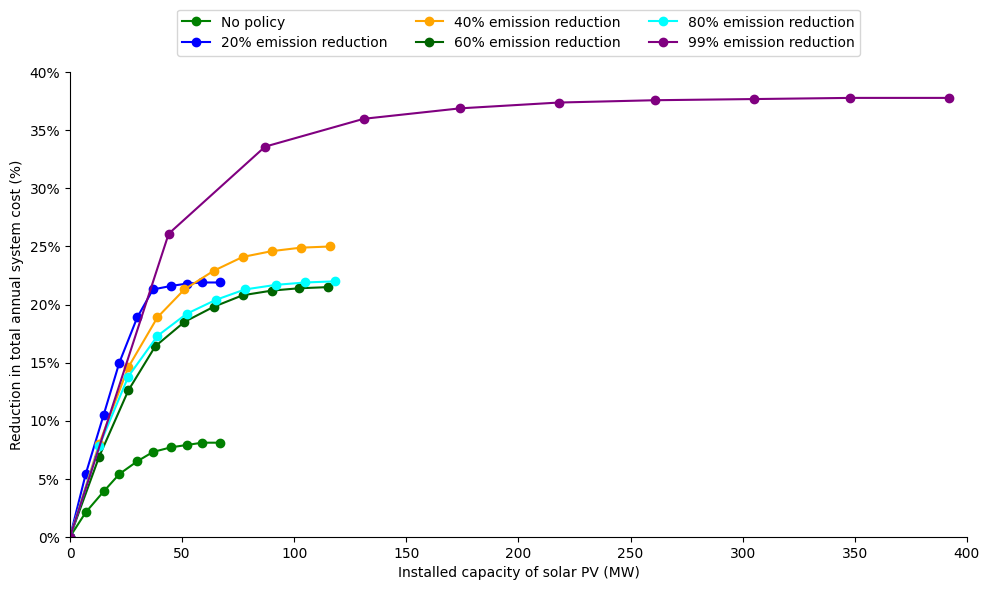

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
capacity_no_policy = [0, 7, 15, 22, 30, 37, 45, 52, 59, 67]
cost_reduction_no_policy = [0.0, 2.1, 3.9, 5.4, 6.5, 7.3, 7.7, 7.9, 8.1, 8.1]

capacity_20 = [0, 7, 15, 22, 30, 37, 45, 52, 59, 67]
cost_reduction_20 = [0.0, 5.4, 10.5, 15.0, 18.9, 21.3, 21.6, 21.8, 21.9, 21.9]

capacity_40 = [0, 13, 26, 39, 51, 64, 77, 90, 103, 116]
cost_reduction_40 = [0.0, 8.0, 14.6, 18.9, 21.3, 22.9, 24.1, 24.6, 24.9, 25.0]

capacity_60 = [0, 13, 26, 38, 51, 64, 77, 90, 102, 115]
cost_reduction_60 = [0.0, 6.9, 12.6, 16.4, 18.5, 19.8, 20.8, 21.2, 21.4, 21.5]

capacity_80 = [0, 13, 26, 39, 52, 65, 78, 92, 105, 118]
cost_reduction_80 = [0.0, 7.8, 13.8, 17.3, 19.2, 20.4, 21.3, 21.7, 21.9, 22.0]

capacity_99 = [0, 44, 87, 131, 174, 218, 261, 305, 348, 392]
cost_reduction_99 = [0.0, 26.1, 33.6, 36.0, 36.9, 37.4, 37.6, 37.7, 37.8, 37.8]

# Plot
figure_solar_unbounded = plt.figure(figsize=(10, 6))

# Plot each curve
plt.plot(capacity_no_policy, cost_reduction_no_policy, marker='o', linestyle='-', label="No policy", color='green')
plt.plot(capacity_20, cost_reduction_20, marker='o', linestyle='-', label="20% emission reduction", color='blue')
plt.plot(capacity_40, cost_reduction_40, marker='o', linestyle='-', label="40% emission reduction", color='orange')
plt.plot(capacity_60, cost_reduction_60, marker='o', linestyle='-', label="60% emission reduction", color='darkgreen')
plt.plot(capacity_80, cost_reduction_80, marker='o', linestyle='-', label="80% emission reduction", color='cyan')
plt.plot(capacity_99, cost_reduction_99, marker='o', linestyle='-', label="99% emission reduction", color='purple')



# Labels and Title
plt.xlabel("Installed capacity of solar PV (MW)")
plt.ylabel("Reduction in total annual system cost (%)")
#plt.title("Achieved cost reduction at different decarbonization levels", fontsize=14)

# Grid
#plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=3, fontsize=10)

# Format y-axis to display percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0f}%"))
# Remove the upper and right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# Set axis limits
plt.xlim(0, 400)  # Set x-axis limits
plt.ylim(0, 40)  # Set y-axis limits
# Tight layout
plt.tight_layout()

# Show plot
plt.show()

figure_solar_unbounded.savefig(r"C:\Users\jonas\OneDrive\Dokumente\EPFL École polytéchnique de Lausanne\Cours\MA4\MIT Master Thesis\Work\Results\Plots\cost_reduction_solar_unbounded.png", dpi=300, bbox_inches='tight')

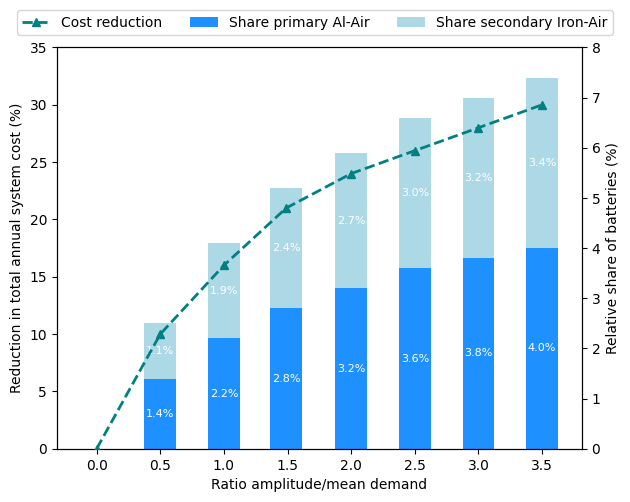

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Data for the plot
x = [0, 0.5, 1, 1.49, 2, 2.5, 3, 3.5]  # Ratio Amplitude/Mean
cost_savings = [0, 10, 16, 21, 24, 26, 28, 30]  # Cost Savings (%)
share_primary = [0.0, 1.4, 2.2, 2.8, 3.2, 3.6, 3.8, 4.0]  # Updated Share Primary Al-Air (%)
share_secondary = [0.0, 1.1, 1.9, 2.4, 2.7, 3.0, 3.2, 3.4]  # Updated Share Secondary Iron-Air (%)

# Create the figure and axes
fig, ax1 = plt.subplots()

# Create twin axis for battery share
ax2 = ax1.twinx()
bar_width = 0.25  # Increased bar width
bars1 = ax2.bar(
    x, share_primary, width=bar_width, label="Share primary Al-Air", 
    color="dodgerblue", zorder=1
)
bars2 = ax2.bar(
    x, share_secondary, width=bar_width, label="Share secondary Iron-Air", 
    color="lightblue", bottom=share_primary, zorder=1
)
ax2.set_ylabel("Relative share of batteries (%)")
ax2.set_ylim(0, 8)

# Plot cost savings line
line, = ax1.plot(
    x, cost_savings, label="Cost reduction", color="teal", 
    linestyle='--', marker='^', linewidth=2, zorder=5
)
ax1.set_xlabel("Ratio amplitude/mean demand")
ax1.set_ylabel("Reduction in total annual system cost (%)")
ax1.tick_params(axis='y')
ax1.set_ylim(0, 35)

# Reorder elements explicitly to ensure correct layering
ax1.set_zorder(3)
ax1.patch.set_visible(False)  # Make ax1 background transparent

# Add values to the bars, excluding 1.1% at x=0.5
for bars, data in zip([bars1, bars2], [share_primary, share_secondary]):
    for bar, height in zip(bars, data):
        bottom = bar.get_y()
        if not (bar.get_x() == 0.5 and height == 1.1):  # Exclude the 1.1% annotation
            if height > 0.02:  # Exclude labels smaller than 2%
                ax2.text(
                    bar.get_x() + bar.get_width() / 2,
                    bottom + height / 2,
                    f"{height:.1f}%",
                    ha="center", va="center", fontsize=8, color="white"
                )

# # Add values to the bars, explicitly excluding 1.1% at x=0.5
# for bars, data in zip([bars1, bars2], [share_primary, share_secondary]):
#     for bar, height in zip(bars, data):  # Iterate over each bar and its corresponding height
#         bottom = bar.get_y()  # Get the starting point of the bar (used for stacking)
#         
#         # Exclude annotation for the specific bar with height 1.1% at x=0.5
#         if not (bar.get_x() == 0.5 - bar_width / 2 and height == 1.1):
#             if height > 0.02:  # Only annotate if the height is greater than 2% to avoid clutter
#                 ax2.text(
#                     bar.get_x() + bar.get_width() / 2,  # Center the text horizontally within the bar
#                     bottom + height / 2,  # Position the text in the middle of the bar
#                     f"{height:.1f}%",  # Format the text as a percentage
#                     ha="center", va="center", fontsize=8, color="white"  # Styling for the text
#                 )


# Title and legends
fig.legend(loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=3, fontsize=10)

# Redraw to apply zorder correctly
ax1.figure.canvas.draw()

# Show plot
plt.tight_layout()
plt.show()

fig.savefig(r"C:\Users\jonas\OneDrive\Dokumente\EPFL École polytéchnique de Lausanne\Cours\MA4\MIT Master Thesis\Work\Results\Plots\demand_variability.png", dpi=300, bbox_inches='tight')

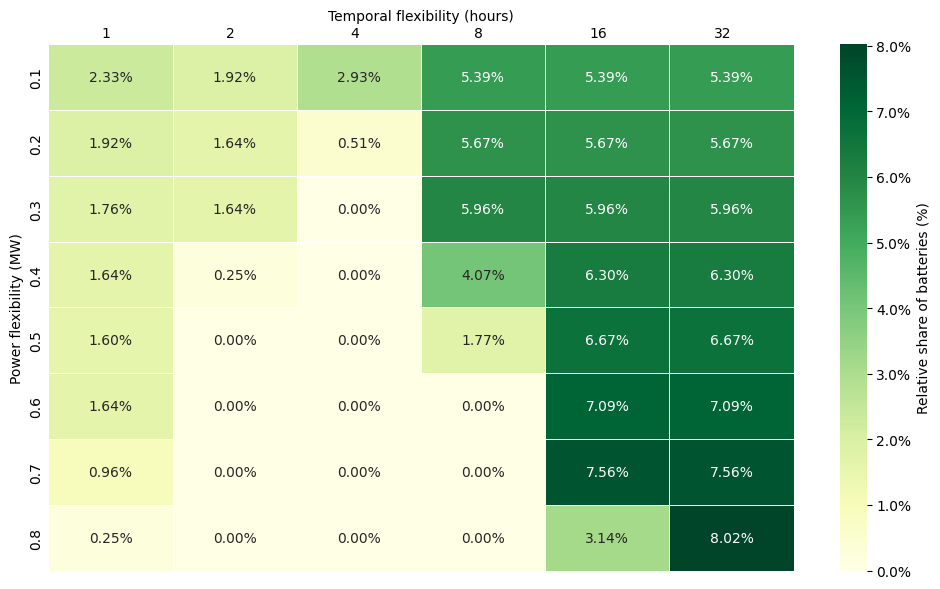

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Your data as a NumPy array
data = np.array([
    [0.0233, 0.0192, 0.0293, 0.0539, 0.0539, 0.0539],
    [0.0192, 0.0164, 0.0051, 0.0567, 0.0567, 0.0567],
    [0.0176, 0.0164, 0.0000, 0.0596, 0.0596, 0.0596],
    [0.0164, 0.0025, 0.0000, 0.0407, 0.0630, 0.0630],
    [0.0160, 0.0000, 0.0000, 0.0177, 0.0667, 0.0667],
    [0.0164, 0.0000, 0.0000, 0.0000, 0.0709, 0.0709],
    [0.0096, 0.0000, 0.0000, 0.0000, 0.0756, 0.0756],
    [0.0025, 0.0000, 0.0000, 0.0000, 0.0314, 0.0802]
])

# Create the heatmap using seaborn
flex_demand = plt.figure(figsize=(10, 6))  # Adjust figure size if needed
ax = sns.heatmap(data, annot=True, fmt=".2%", cmap="YlGn", cbar_kws={'label': 'Relative share of batteries (%)'}, linewidths=0.5)

# Set axis labels and title
plt.xlabel("Temporal flexibility (hours)")
plt.ylabel("Power flexibility (MW)")

# Move the x-axis to the top
ax.xaxis.set_label_position('top')  # Move x-axis label to the top
ax.xaxis.tick_top()  # Move x-axis ticks to the top

# Define the x-axis and y-axis markers
x_markers = ["1", "2", "4", "8", "16", "32"]
y_markers = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8"]

# Set x and y ticks with the defined markers
ax.set_xticks(np.arange(len(x_markers)) + 0.5, minor=False)  # Center x ticks
ax.set_xticklabels(x_markers, rotation=0, ha="right")
ax.set_yticks(np.arange(len(y_markers)) + 0.5, minor=False)  # Center y ticks
ax.set_yticklabels(y_markers)

# Remove ticks but keep tick labels
ax.tick_params(axis='both', which='both', length=0)  # Set tick length to 0 to hide ticks

# Format the colorbar tick labels as percentages
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:.1%}'))

# Add a border around the heatmap
#for _, spine in ax.spines.items():
#    spine.set_visible(True)
#    spine.set_linewidth(1.5)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Save the plot to file
flex_demand.savefig(r"C:\Users\jonas\OneDrive\Dokumente\EPFL École polytéchnique de Lausanne\Cours\MA4\MIT Master Thesis\Work\Results\Plots\flexible_demand_gen_cap.png", dpi=300, bbox_inches='tight')


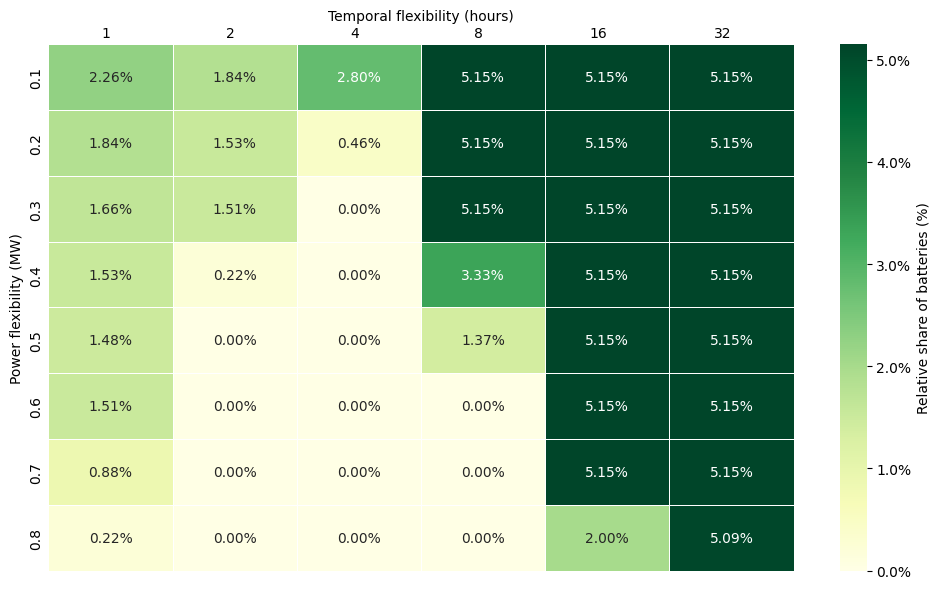

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors

# Your data as a NumPy array
data = np.array([
    [0.0226, 0.0184, 0.0280, 0.0515, 0.0515, 0.0515],
    [0.0184, 0.0153, 0.0046, 0.0515, 0.0515, 0.0515],
    [0.0166, 0.0151, 0.0000, 0.0515, 0.0515, 0.0515],
    [0.0153, 0.0022, 0.0000, 0.0333, 0.0515, 0.0515],
    [0.0148, 0.0000, 0.0000, 0.0137, 0.0515, 0.0515],
    [0.0151, 0.0000, 0.0000, 0.0000, 0.0515, 0.0515],
    [0.0088, 0.0000, 0.0000, 0.0000, 0.0515, 0.0515],
    [0.0022, 0.0000, 0.0000, 0.0000, 0.0200, 0.0509]
])

# Create the heatmap using seaborn
flex_demand = plt.figure(figsize=(10, 6))  # Adjust figure size if needed
ax = sns.heatmap(data, annot=True, fmt=".2%", cmap="YlGn", cbar_kws={'label': 'Relative share of batteries (%)'}, linewidths=0.5)

# Set axis labels and title
plt.xlabel("Temporal flexibility (hours)")
plt.ylabel("Power flexibility (MW)")

# Move the x-axis to the top
ax.xaxis.set_label_position('top')  # Move x-axis label to the top
ax.xaxis.tick_top()  # Move x-axis ticks to the top

# Define the x-axis and y-axis markers
x_markers = ["1", "2", "4", "8", "16", "32"]
y_markers = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8"]

# Set x and y ticks with the defined markers
ax.set_xticks(np.arange(len(x_markers)) + 0.5, minor=False)  # Center x ticks
ax.set_xticklabels(x_markers, rotation=0, ha="right")
ax.set_yticks(np.arange(len(y_markers)) + 0.5, minor=False)  # Center y ticks
ax.set_yticklabels(y_markers)

# Remove ticks but keep tick labels
ax.tick_params(axis='both', which='both', length=0)  # Set tick length to 0 to hide ticks

# Format the colorbar tick labels as percentages
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:.1%}'))

# Add a border around the heatmap
#for _, spine in ax.spines.items():
#    spine.set_visible(True)
#    spine.set_linewidth(1.5)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Save the plot to file
flex_demand.savefig(r"C:\Users\jonas\OneDrive\Dokumente\EPFL École polytéchnique de Lausanne\Cours\MA4\MIT Master Thesis\Work\Results\Plots\flexible_demand_peak_demand.png", dpi=300, bbox_inches='tight')


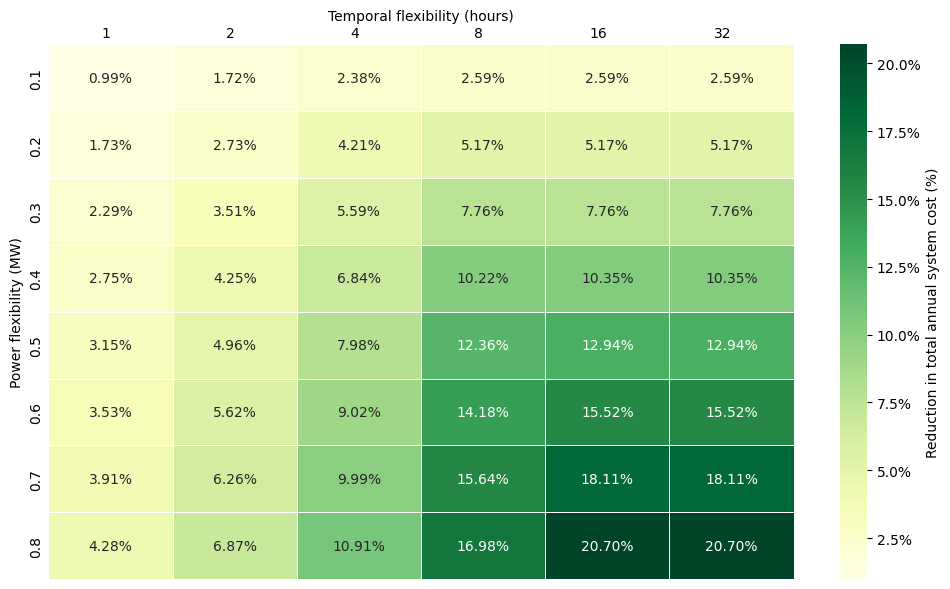

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors


data = np.array([
    [0.0099, 0.0172, 0.0238, 0.0259, 0.0259, 0.0259],
    [0.0173, 0.0273, 0.0421, 0.0517, 0.0517, 0.0517],
    [0.0229, 0.0351, 0.0559, 0.0776, 0.0776, 0.0776],
    [0.0275, 0.0425, 0.0684, 0.1022, 0.1035, 0.1035],
    [0.0315, 0.0496, 0.0798, 0.1236, 0.1294, 0.1294],
    [0.0353, 0.0562, 0.0902, 0.1418, 0.1552, 0.1552],
    [0.0391, 0.0626, 0.0999, 0.1564, 0.1811, 0.1811],
    [0.0428, 0.0687, 0.1091, 0.1698, 0.2070, 0.2070]
])


# Create the heatmap using seaborn
flex_demand = plt.figure(figsize=(10, 6))  # Adjust figure size if needed
ax = sns.heatmap(data, annot=True, fmt=".2%", cmap="YlGn", cbar_kws={'label': 'Reduction in total annual system cost (%)'}, linewidths=0.5)

# Set axis labels and title
plt.xlabel("Temporal flexibility (hours)")
plt.ylabel("Power flexibility (MW)")

# Move the x-axis to the top
ax.xaxis.set_label_position('top')  # Move x-axis label to the top
ax.xaxis.tick_top()  # Move x-axis ticks to the top

# Define the x-axis and y-axis markers
x_markers = ["1", "2", "4", "8", "16", "32"]
y_markers = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8"]

# Set x and y ticks with the defined markers
ax.set_xticks(np.arange(len(x_markers)) + 0.5, minor=False)  # Center x ticks
ax.set_xticklabels(x_markers, rotation=0, ha="right")
ax.set_yticks(np.arange(len(y_markers)) + 0.5, minor=False)  # Center y ticks
ax.set_yticklabels(y_markers)

# Remove ticks but keep tick labels
ax.tick_params(axis='both', which='both', length=0)  # Set tick length to 0 to hide ticks

# Format the colorbar tick labels as percentages
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:.1%}'))

# Add a border around the heatmap
#for _, spine in ax.spines.items():
#    spine.set_visible(True)
#    spine.set_linewidth(1.5)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Save the plot to file
flex_demand.savefig(r"C:\Users\jonas\OneDrive\Dokumente\EPFL École polytéchnique de Lausanne\Cours\MA4\MIT Master Thesis\Work\Results\Plots\demand_variability_cost_savings.png", dpi=300, bbox_inches='tight')

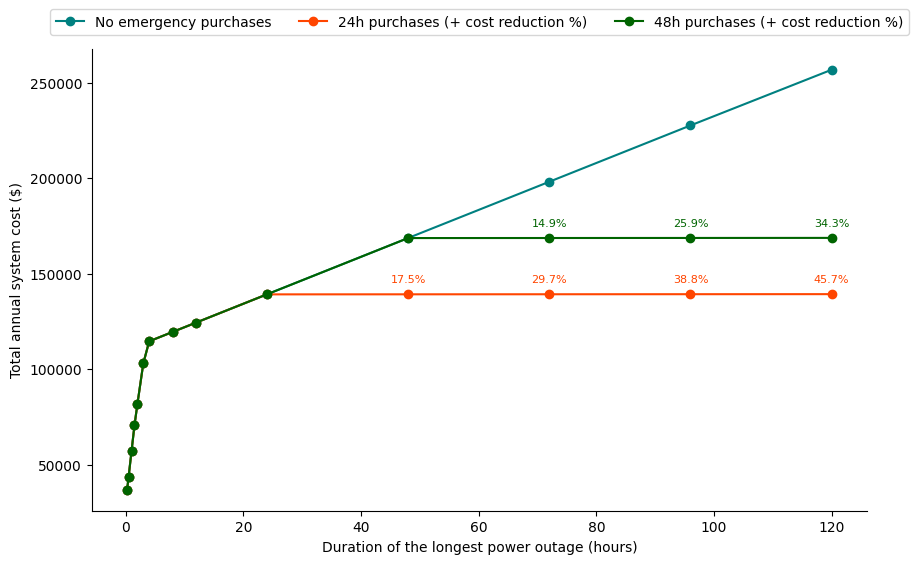

In [80]:
import matplotlib.pyplot as plt

# Data from the table
duration = [0.25, 0.5, 1, 1.5, 2, 3, 4, 8, 12, 24, 48, 72, 96, 120]
no_emergency = [36934.75569, 43676.39846, 57159.68401, 70642.96955, 81826.42965,
                 103059.4395, 114598.6023, 119509.161, 124419.7198, 139151.3959,
                 168614.7483, 198078.1007, 227541.4531, 256698.0074]
h24_emergency = [36934.75569, 43676.39846, 57159.68401, 70642.96955, 81826.42965,
                  103059.4395, 114598.6023, 119509.161, 124419.7198, 139151.3959,
                  139180.8088, 139210.2216, 139239.6345, 139269.0473]
h48_emergency = [36934.75569, 43676.39846, 57159.68401, 70642.96955, 81826.42965,
                  103059.4395, 114598.6023, 119509.161, 124419.7198, 139151.3959,
                  168614.7483, 168643.9666, 168673.574, 168702.7923]

# Assuming 'no_emergency', 'h24_emergency', and 'h48_emergency' are lists or arrays of costs
# Calculate cost savings in percentage
cost_savings_24 = [(1 - h24 / no) * 100 for h24, no in zip(h24_emergency, no_emergency)]
cost_savings_48 = [(1 - h48 / no) * 100 for h48, no in zip(h48_emergency, no_emergency)]

# Create the plot
emergency_purch = plt.figure(figsize=(10, 6))

# Plot the data
plt.plot(duration, no_emergency, marker='o', color='teal', label='No emergency purchases')
plt.plot(duration, h24_emergency, marker='o', color='orangered', label='24h purchases (+ cost reduction %)')
plt.plot(duration, h48_emergency, marker='o', color='darkgreen', label='48h purchases (+ cost reduction %)')


# Annotate the cost savings only if greater than 0%
for x, y_no, y_24, y_48, cs_24, cs_48 in zip(duration, no_emergency, h24_emergency, h48_emergency, cost_savings_24, cost_savings_48):
    if cs_24 > 0:  # Only annotate if cost savings for 24h is greater than 0%
        plt.text(x, y_24 + 5000, f'{cs_24:.1f}%', color='orangered', fontsize=8, ha='center', va='bottom')  # Adjust spacing
    if cs_48 > 0:  # Only annotate if cost savings for 48h is greater than 0%
        plt.text(x, y_48 + 5000, f'{cs_48:.1f}%', color='darkgreen', fontsize=8, ha='center', va='bottom')  # Adjust spacing

# Customize the plot
plt.xlabel('Duration of the longest power outage (hours)')
plt.ylabel('Total annual system cost ($)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)
plt.grid(False)

# Remove the upper and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

emergency_purch.savefig(r"C:\Users\jonas\OneDrive\Dokumente\EPFL École polytéchnique de Lausanne\Cours\MA4\MIT Master Thesis\Work\Results\Plots\emergency_purchases.png", dpi=300, bbox_inches='tight')


## Appendix


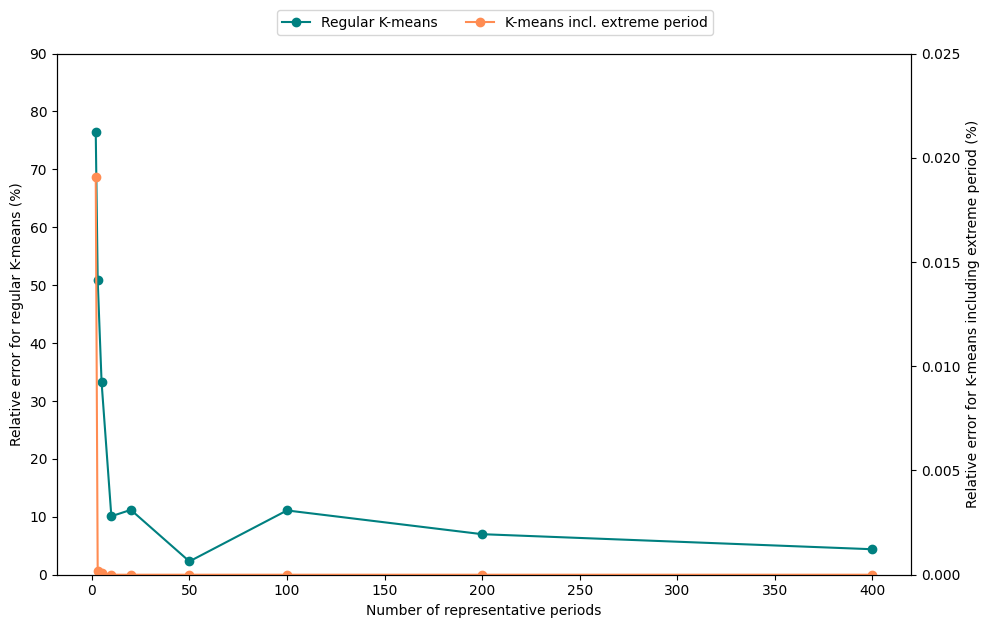

In [2]:
import matplotlib.pyplot as plt

# Data from the provided table
num_periods = [2, 3, 5, 10, 20, 50, 100, 200, 400]  # Number of representative periods
regular_kmeans_error = [76.5, 50.9, 33.2, 10.1, 11.2, 2.3, 11.1, 7.0, 4.4]  # Relative error for regular K-means clustering
extreme_kmeans_error = [0.0191, 0.0002, 0.0001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  # Relative error for K-means incl. extreme period

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot for regular K-means clustering (left y-axis)
ax1.plot(num_periods, regular_kmeans_error, marker='o', color='#008080', label='Regular K-means')
ax1.set_xlabel('Number of representative periods')
ax1.set_ylabel('Relative error for regular K-means (%)')
ax1.tick_params(axis='y')
ax1.set_ylim(0, 90)  # Adjust y-axis limits

# Plot for K-means incl. extreme period (right y-axis)
ax2 = ax1.twinx()
ax2.plot(num_periods, extreme_kmeans_error, marker='o', color='#ff8c52', label='K-means incl. extreme period')
ax2.set_ylabel('Relative error for K-means including extreme period (%)')
ax2.tick_params(axis='y')
ax2.set_ylim(0, 0.025)  # Adjust y-axis limits

# Add grid and legend
#ax1.grid(visible=True, linestyle='--', alpha=0.5)
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)
plt.grid(False)

# Add a title
#plt.title('Impact of Extreme Periods on K-means Clustering Error')

# Show the plot
plt.tight_layout()
plt.show()

fig.savefig(r"C:\Users\jonas\OneDrive\Dokumente\EPFL École polytéchnique de Lausanne\Cours\MA4\MIT Master Thesis\Work\Results\Plots\clustering_accuracy.png", dpi=300, bbox_inches='tight')

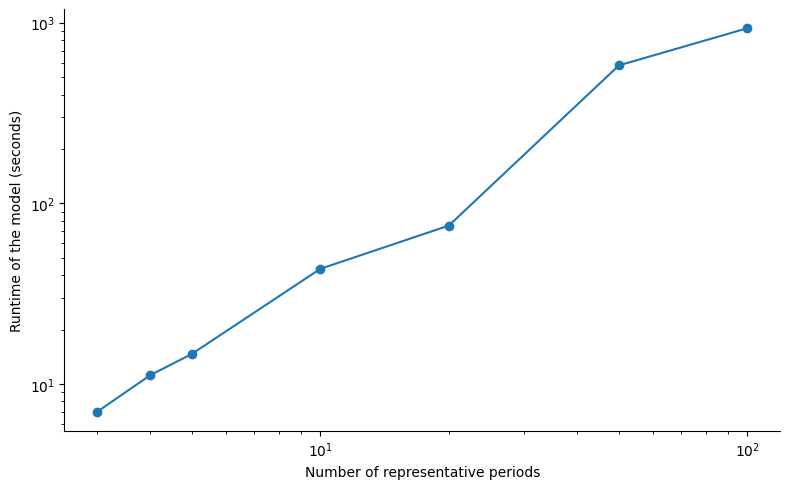

In [2]:
import matplotlib.pyplot as plt

# Data from the provided table
representative_periods = [3, 4, 5, 10, 20, 50, 100]  # Number of representative periods
runtime_seconds = [6.995744944, 11.18407798, 14.64196181, 43.34978986, 75.28436899, 579.791693, 931.7711651]  # Runtime in seconds

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(representative_periods, runtime_seconds, marker='o', linestyle='-', label='Runtime')

# Set log-log scale
plt.xscale('log')
plt.yscale('log')

# Add labels, title, and grid
plt.xlabel('Number of representative periods')
plt.ylabel('Runtime of the model (seconds)')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.title('Runtime (log-log)')
#plt.grid(which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()


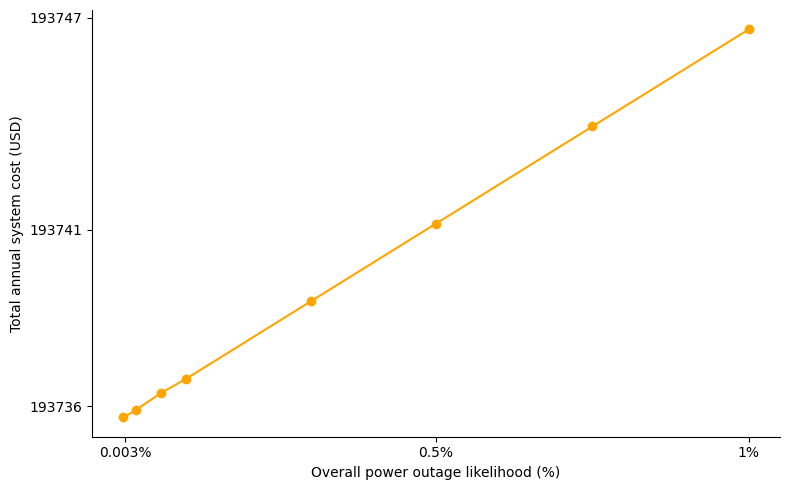

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Data for the plot
probability = [0.00, 0.02, 0.06, 0.10, 0.30, 0.50, 0.75, 1.0]  # Probability (%)
total_cost = [193735.6871, 193735.896, 193736.3729, 193736.7751, 193738.9731, 193741.1711, 193743.9186, 193746.6661]  # Total Cost (USD)

# Create the plot
total_prob = plt.figure(figsize=(8, 5))
plt.plot(probability, total_cost, marker='o', color='orange', linestyle='-', label='Cost vs Probability')

# Add labels and grid
plt.xlabel('Overall power outage likelihood (%)')
plt.ylabel('Total annual system cost (USD)')
#plt.grid(True)

# Format x-axis to display specific values
x_ticks = [0.003, 0.5, 1.0]  # Specific x-ticks to display
x_tick_labels = ["0.003%", "0.5%", "1%"]  # Custom labels for the ticks
plt.xticks(x_ticks, x_tick_labels)
y_ticks = [193736, 193741, 193747]
plt.yticks(y_ticks)

# Disable scientific notation for the y-axis
plt.ticklabel_format(style='plain', axis='y')

# Use plain formatting for the y-axis
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().ticklabel_format(style='plain', axis='y')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Show the plot
plt.tight_layout()
plt.show()

total_prob.savefig(r"C:\Users\jonas\OneDrive\Dokumente\EPFL École polytéchnique de Lausanne\Cours\MA4\MIT Master Thesis\Work\Results\Plots\relationship_overall_likelihood.png", dpi=300, bbox_inches='tight')
